<a href="https://colab.research.google.com/github/khimanshu11/amazon-ml-challange/blob/main/AmazonGenderNeutralityAndInclusioin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import LabelEncoder

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/khimanshu11/amazon-ml-challange/main/dataset/Train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/khimanshu11/amazon-ml-challange/main/dataset/Test.csv")

### Start Exploratory Data Analysis

In [ ]:
display(train.head())
display(test.head())

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9


In [ ]:
print(len(np.unique(np.where(pd.isna(train))[0])))
print(len(np.unique(np.where(pd.isna(test))[0])))

3336
0


In [ ]:
train.shape

(13645, 22)

In [ ]:
train.describe()

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent
count,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000
mean,13150.781239,30.691242,7.100257,6.547746,2014.452254,18.076951,25.061488,3.392085,11.967021,75.880093
std,6475.019626,3.881378,1.346539,3.426920,3.426920,7.208130,7.478119,1.044676,4.897836,14.894207
min,2001.000000,24.000000,4.000000,1.000000,2009.000000,6.000000,10.000000,1.000000,4.000000,33.530000
25%,7501.000000,28.000000,6.000000,4.000000,2012.000000,12.000000,19.000000,3.000000,8.000000,68.720000
50%,13173.000000,31.000000,7.000000,7.000000,2014.000000,18.000000,25.000000,3.000000,12.000000,78.110000
75%,18718.000000,34.000000,8.000000,9.000000,2017.000000,24.000000,31.000000,4.000000,16.000000,87.990000
max,24390.000000,42.000000,10.000000,12.000000,2020.000000,30.000000,40.000000,5.000000,20.000000,95.500000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

We can observe from the train info that _BiasInfluentialFactor_ has missing data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

In [ ]:
train[train.LanguageOfCommunication == "English"]

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,12644,Lincoln,English,35,Male,JR85289,PhD,Artificial Intelligence,Tier 2,5,5,2016,11,19,Married,5,SDE,MidSized,Product,10,NaN,69.49
13636,12229,Micheal,English,29,Male,JR85289,MCA,Artificial Intelligence,Tier 2,10,3,2018,27,37,Married,3,SEM,Enterprise,Engineering,9,LatestDegreeCGPA,57.14
13638,8000,Norbert,English,37,Male,JR87525,M.Tech,Information Technology,Tier 2,8,11,2010,8,18,Single,3,SSE,MidSized,Design,11,DegreeBranch,88.15
13640,19504,Perley,English,25,Female,JR87525,Dual MBA,Electrical,Tier 2,7,2,2019,30,34,Married,3,SDE,Startup,Engineering,5,Gender,93.65


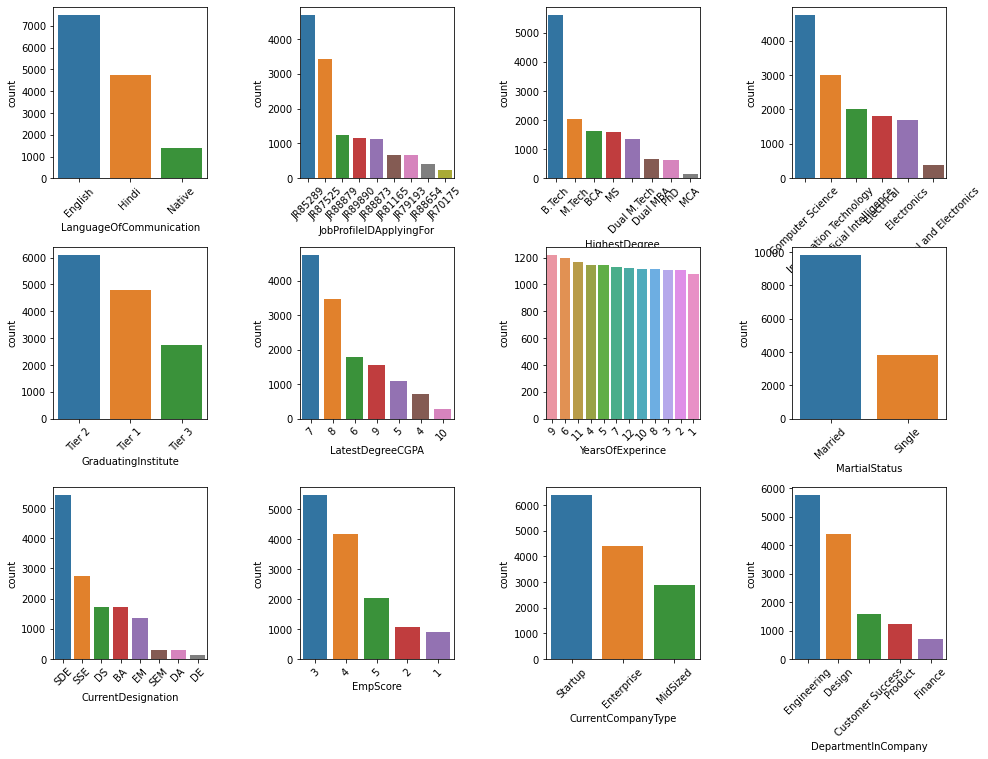

In [ ]:
req_col = ["LanguageOfCommunication", 
           "JobProfileIDApplyingFor", 
           "HighestDegree",
           "DegreeBranch",
           "GraduatingInstitute",
           "LatestDegreeCGPA",
           "YearsOfExperince",
           "MartialStatus",
           "CurrentDesignation",
           "EmpScore",
           "CurrentCompanyType",
           "DepartmentInCompany"]
fig = plt.figure(figsize=(16,12))
fig.subplots_adjust(hspace=0.4, wspace=0.6)
for i in range(len(req_col)):
  # j = i*3
  # for j in range(j+3):
  co_val = train[req_col[i]].value_counts()
  ax = fig.add_subplot(3, 4, i+1)
  sns.countplot(x=req_col[i], data=train, order = co_val.index)
  plt.xticks(rotation=45)
# sns.barplot(y=loc_count.values, x = loc_count.index, order=loc_count.index, ax = ax[1]) 

In [ ]:
# fig = plt.figure(figsize=(16,12))
# fig.subplots_adjust(hspace=0.4, wspace=0.6)
# for i in range(len(req_col)):
#   # j = i*3
#   # for j in range(j+3):
#   co_val = train[req_col[i]].value_counts()
#   # ax = fig.add_subplot(3, 4, i+1)
#   sns.displot(train, x="FitmentPercent", hue=req_col[i], kind = "kde")
#   plt.xticks(rotation=45)

Check spread and count of each category for each feature

Check different type of LanguageOfCommunication 



array(['English', 'Native', 'Hindi'], dtype=object)

3

English    7510
Hindi      4733
Native     1402
Name: LanguageOfCommunication, dtype: int64

English    0.550385
Hindi      0.346867
Native     0.102748
Name: LanguageOfCommunication, dtype: float64

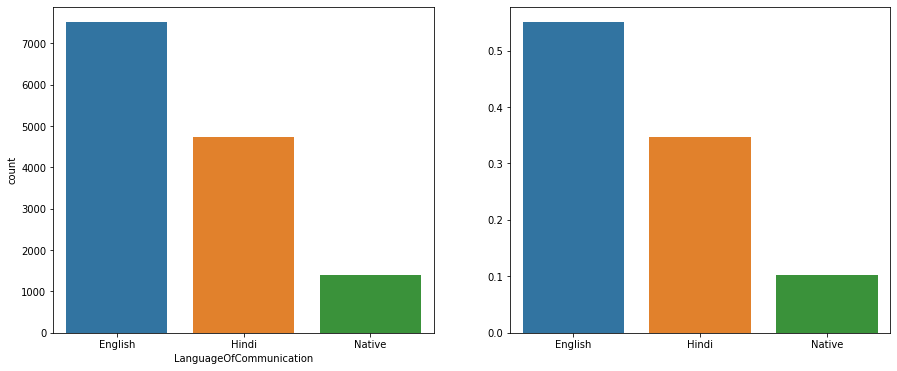

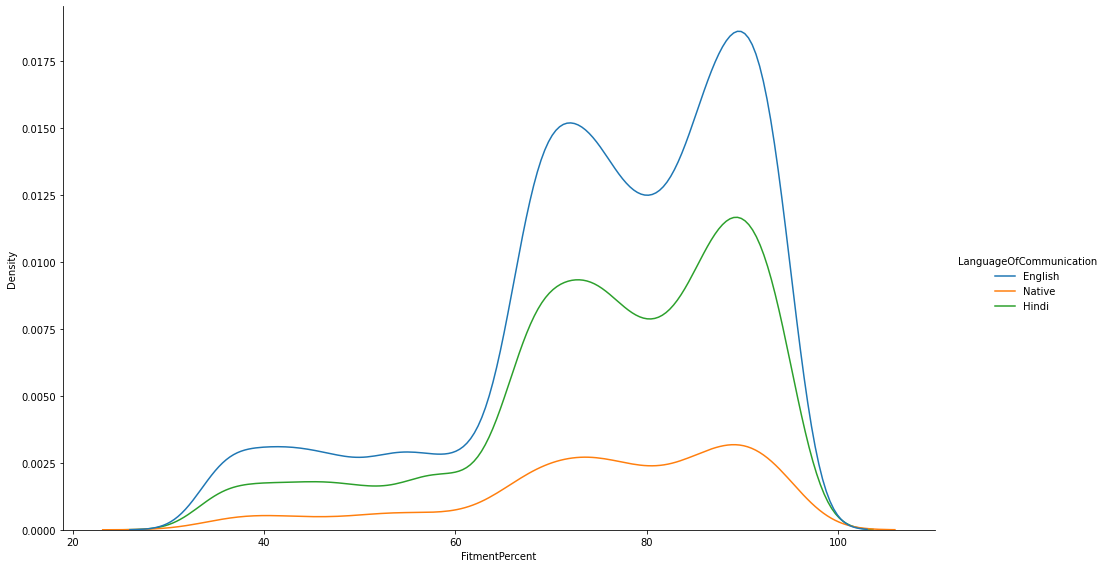

In [ ]:
print("Check different type of LanguageOfCommunication \n")
display(train.LanguageOfCommunication.unique())
display(len(train.LanguageOfCommunication.unique()))
display(train.LanguageOfCommunication.value_counts())
loc_count = train.LanguageOfCommunication.value_counts(normalize=True)
display(loc_count)
fig, ax =plt.subplots(1, 2, figsize = (15,6))
sns.countplot(x="LanguageOfCommunication", data=train, order=["English", "Hindi", "Native"], ax = ax[0])
sns.barplot(y=loc_count.values, x = loc_count.index, order=loc_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="LanguageOfCommunication", kind = "kde", height=8, aspect=10/6)

In [ ]:
pd.DataFrame({'LanguageOfCommunication': train.LanguageOfCommunication.value_counts().index, '#':train.LanguageOfCommunication.value_counts().values, '%': train.LanguageOfCommunication.value_counts(normalize=True).values.round(2)})

,LanguageOfCommunication,#,%
0,English,7510,0.55
1,Hindi,4733,0.35
2,Native,1402,0.10


Candidates with __LanguageOfCommunication__ as _English_ has applied most around 55% and candidates who has selected _Native_ has applied lowest around 10% only.

As density curve shows not much difference in different **LanguageOfCommunication** selected by candidates only difference in volume of candidate applied

Check different type of Gender 



array(['Male', 'Female', 'Other'], dtype=object)

3

Male      8376
Female    4326
Other      943
Name: Gender, dtype: int64

Male      0.613851
Female    0.317039
Other     0.069110
Name: Gender, dtype: float64

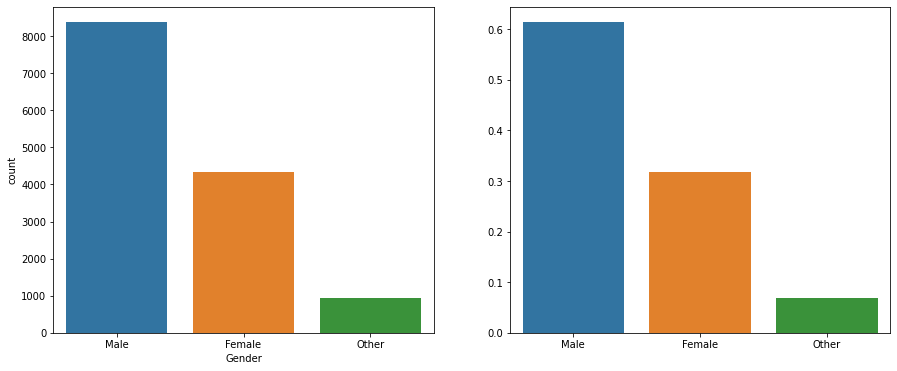

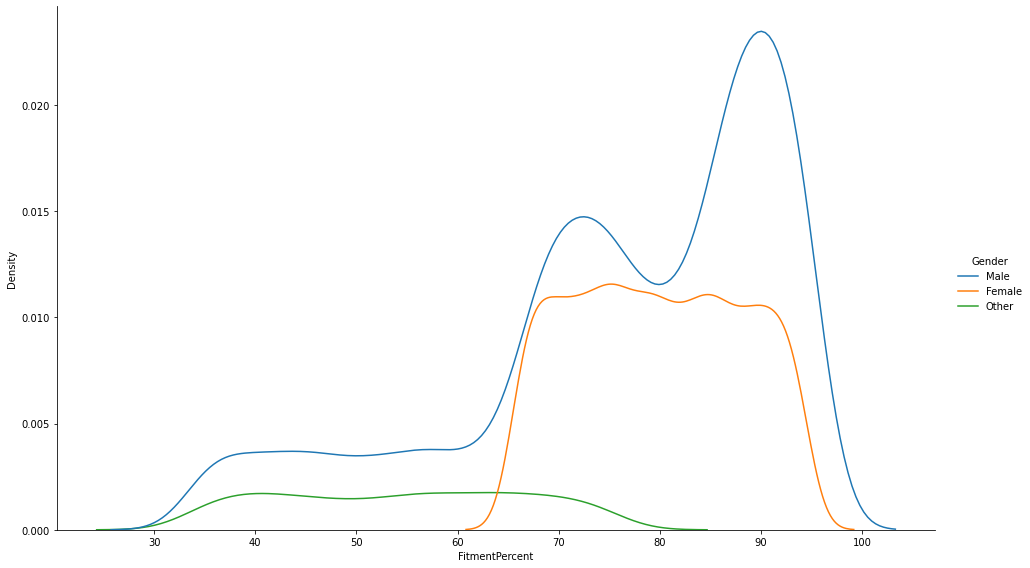

In [ ]:
print("Check different type of Gender \n")
display(train.Gender.unique())
display(len(train.Gender.unique()))

display(train.Gender.value_counts())
g_count = train.Gender.value_counts(normalize=True)
display(g_count)
fig, ax =plt.subplots(1, 2, figsize = (15,6))
sns.countplot(x="Gender", data=train, order=g_count.index, ax = ax[0])
sns.barplot(y=g_count.values, x = g_count.index, order=g_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="Gender", kind = "kde", height=8, aspect=10/6)

In [ ]:
pd.DataFrame({'Gender': train.Gender.value_counts().index, '#':train.Gender.value_counts().values, '%': train.Gender.value_counts(normalize=True).values.round(2)})

,Gender,#,%
0,Male,8376,0.61
1,Female,4326,0.32
2,Other,943,0.07


As per above chart there is a biased towards female and other gender 

*  **Female** => In the above chart density of female candidate lies between 60 to 100 so they are not getting less than 60%

*  **Other** => Other gender density looks even bad as they are very few who got more than 80 so they are getting less than 80% fitment

Check different type of JobProfileIDApplyingFor 



array(['JR85289', 'JR87525', 'JR70175', 'JR88879', 'JR88873', 'JR89890',
       'JR81165', 'JR79193', 'JR88654'], dtype=object)

9

JR85289    4697
JR87525    3416
JR88879    1231
JR89890    1157
JR88873    1123
JR81165     681
JR79193     678
JR88654     420
JR70175     242
Name: JobProfileIDApplyingFor, dtype: int64

JR85289    0.344229
JR87525    0.250348
JR88879    0.090216
JR89890    0.084793
JR88873    0.082301
JR81165    0.049908
JR79193    0.049689
JR88654    0.030781
JR70175    0.017735
Name: JobProfileIDApplyingFor, dtype: float64

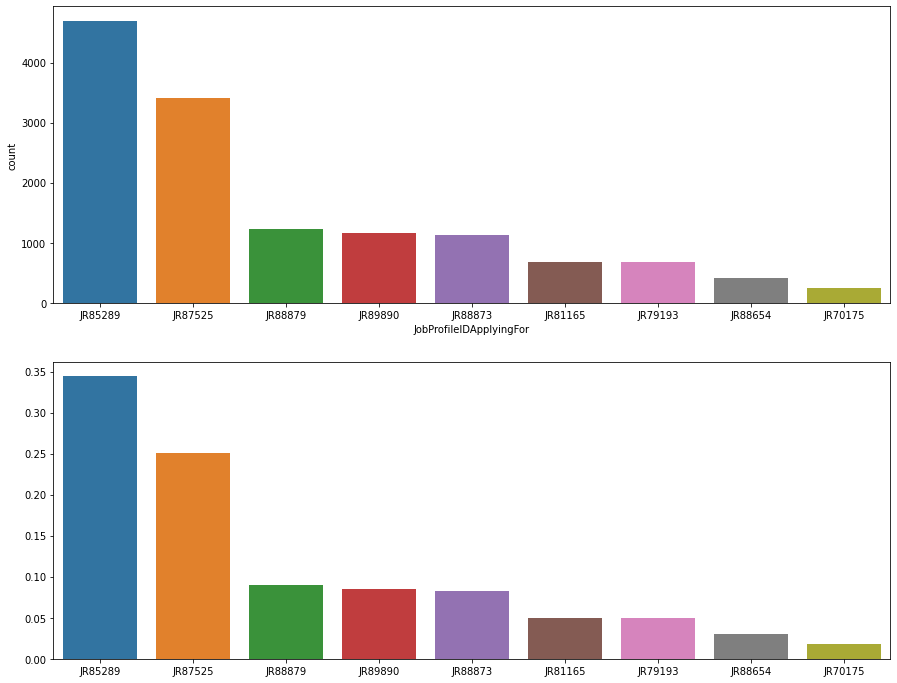

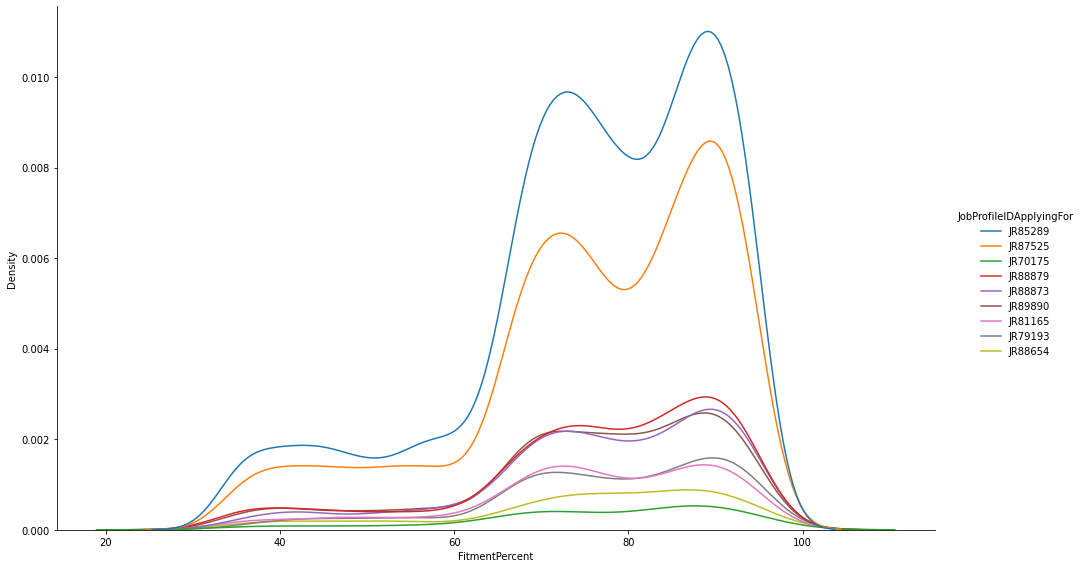

In [ ]:
print("Check different type of JobProfileIDApplyingFor \n")
display(train.JobProfileIDApplyingFor.unique())
display(len(train.JobProfileIDApplyingFor.unique()))

display(train.JobProfileIDApplyingFor.value_counts())
jpidaf_count = train.JobProfileIDApplyingFor.value_counts(normalize=True)
display(jpidaf_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="JobProfileIDApplyingFor", data=train, order=jpidaf_count.index, ax = ax[0])
sns.barplot(y=jpidaf_count.values, x = jpidaf_count.index, order=jpidaf_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="JobProfileIDApplyingFor", kind = "kde", height=8, aspect=10/6)

In [ ]:
pd.DataFrame({'JobProfileIDApplyingFor': train.JobProfileIDApplyingFor.value_counts().index, '#':train.JobProfileIDApplyingFor.value_counts().values, '%': train.JobProfileIDApplyingFor.value_counts(normalize=True).values.round(2)})

,JobProfileIDApplyingFor,#,%
0,JR85289,4697,0.34
1,JR87525,3416,0.25
2,JR88879,1231,0.09
3,JR89890,1157,0.08
4,JR88873,1123,0.08
5,JR81165,681,0.05
6,JR79193,678,0.05
7,JR88654,420,0.03
8,JR70175,242,0.02


Maximum applied for Job Profile => JR85289    4697 

Minimu applied for Job Profile => JR70175     242

Check different type of HighestDegree 



array(['B.Tech', 'PhD', 'BCA', 'Dual M.Tech', 'M.Tech', 'MS', 'Dual MBA',
       'MCA'], dtype=object)

8

B.Tech         5619
M.Tech         2026
BCA            1634
MS             1579
Dual M.Tech    1358
Dual MBA        665
PhD             624
MCA             140
Name: HighestDegree, dtype: int64

B.Tech         0.411799
M.Tech         0.148479
BCA            0.119751
MS             0.115720
Dual M.Tech    0.099524
Dual MBA       0.048736
PhD            0.045731
MCA            0.010260
Name: HighestDegree, dtype: float64

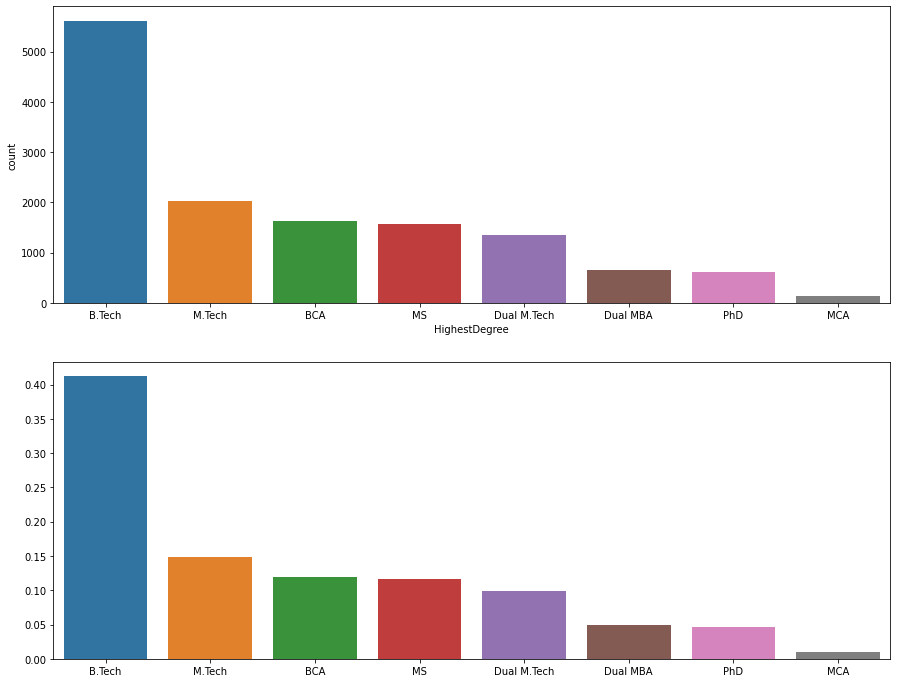

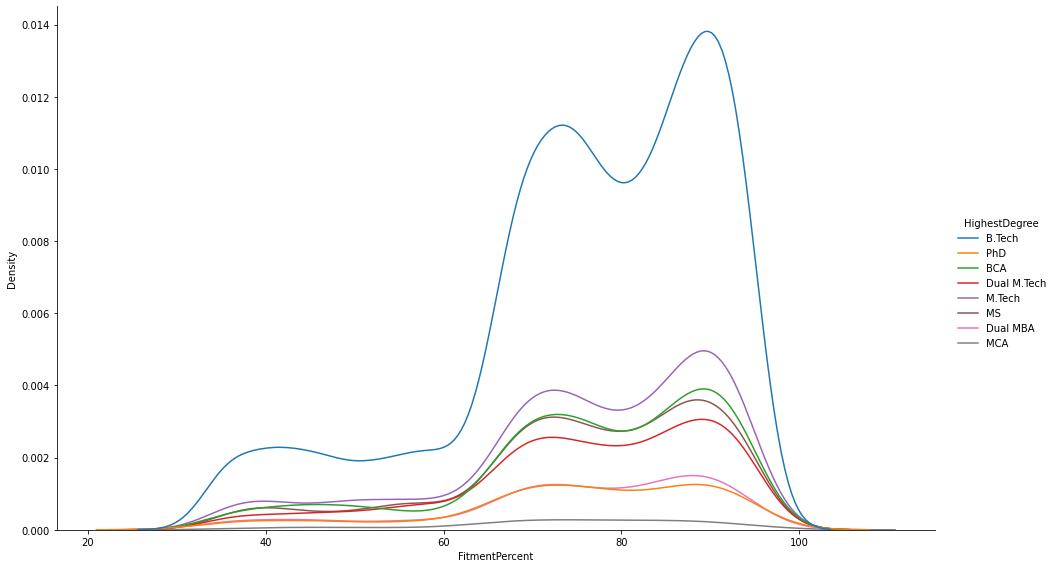

In [ ]:
print("Check different type of HighestDegree \n")
display(train.HighestDegree.unique())
display(len(train.HighestDegree.unique()))

display(train.HighestDegree.value_counts())
hd_count = train.HighestDegree.value_counts(normalize=True)
display(hd_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="HighestDegree", data=train, order=hd_count.index, ax = ax[0])
sns.barplot(y=hd_count.values, x = hd_count.index, order=hd_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="HighestDegree", kind = "kde", height=8, aspect=10/6)

In [ ]:
pd.DataFrame({'HighestDegree': train.HighestDegree.value_counts().index, '#':train.HighestDegree.value_counts().values, '%': train.HighestDegree.value_counts(normalize=True).values.round(2)})

,HighestDegree,#,%
0,B.Tech,5619,0.41
1,M.Tech,2026,0.15
2,BCA,1634,0.12
3,MS,1579,0.12
4,Dual M.Tech,1358,0.10
5,Dual MBA,665,0.05
6,PhD,624,0.05
7,MCA,140,0.01


Maximum candidate **HighestDegree** is **B.Tech** and minimum is **MCA**

Check different type of DegreeBranch 



array(['Electrical', 'Artificial Intelligence', 'Computer Science',
       'Information Technology', 'Electronics',
       'Electrical and Electronics'], dtype=object)

6

Computer Science              4749
Information Technology        2993
Artificial Intelligence       2001
Electrical                    1803
Electronics                   1699
Electrical and Electronics     400
Name: DegreeBranch, dtype: int64

Computer Science              0.348040
Information Technology        0.219348
Artificial Intelligence       0.146647
Electrical                    0.132136
Electronics                   0.124514
Electrical and Electronics    0.029315
Name: DegreeBranch, dtype: float64

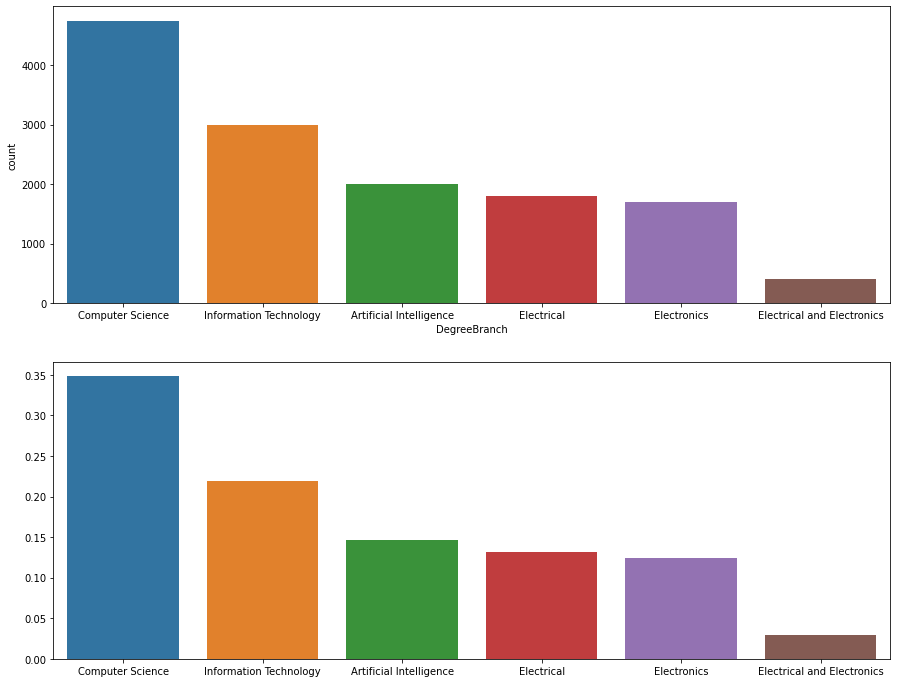

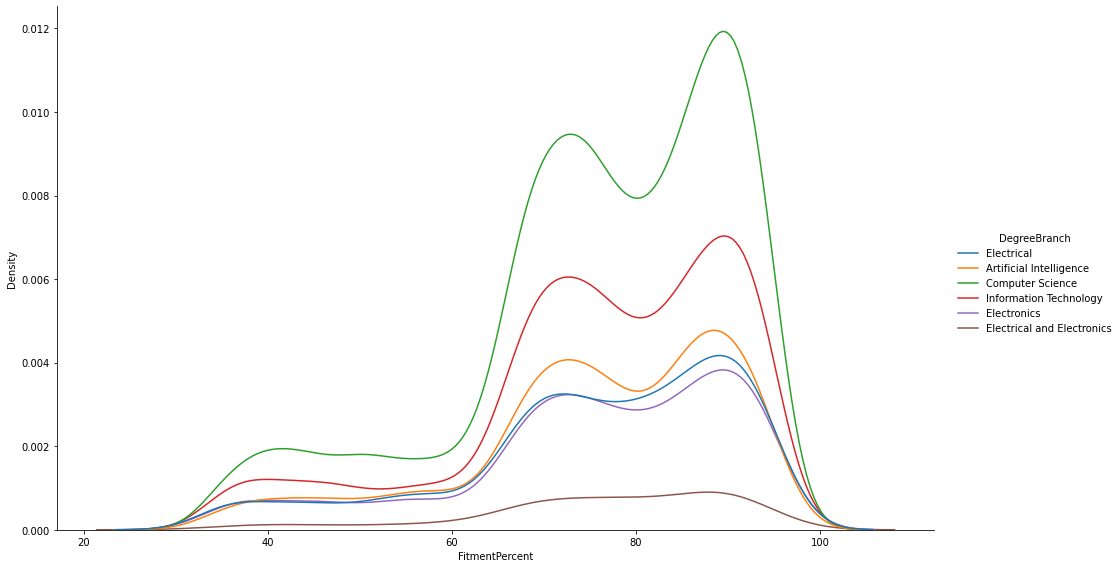

In [ ]:
print("Check different type of DegreeBranch \n")
display(train.DegreeBranch.unique())
display(len(train.DegreeBranch.unique()))

display(train.DegreeBranch.value_counts())
db_count = train.DegreeBranch.value_counts(normalize=True)
display(db_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="DegreeBranch", data=train, order=db_count.index, ax = ax[0])
sns.barplot(y=db_count.values, x = db_count.index, order=db_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="DegreeBranch", kind = "kde", height=8, aspect=10/6)

In [ ]:
pd.DataFrame({'DegreeBranch': train.DegreeBranch.value_counts().index, '#':train.DegreeBranch.value_counts().values, '%': train.DegreeBranch.value_counts(normalize=True).values.round(2)}) 

,DegreeBranch,#,%
0,Computer Science,4749,0.35
1,Information Technology,2993,0.22
2,Artificial Intelligence,2001,0.15
3,Electrical,1803,0.13
4,Electronics,1699,0.12
5,Electrical and Electronics,400,0.03


Maximum candidates are from **Computer Science** and **Information Technology** branch which is around **56.7%** which is more than half the share

Check different type of BiasInfluentialFactor 



array(['YearsOfExperince', nan, 'Gender', 'DegreeBranch',
       'CurrentCompanyType', 'MartialStatus', 'HighestDegree', 'EmpScore',
       'Ethinicity', 'LatestDegreeCGPA'], dtype=object)

10

DegreeBranch          2858
Gender                2605
YearsOfExperince      1561
CurrentCompanyType    1174
EmpScore               659
HighestDegree          582
Ethinicity             328
MartialStatus          280
LatestDegreeCGPA       262
Name: BiasInfluentialFactor, dtype: int64

DegreeBranch          0.277233
Gender                0.252692
YearsOfExperince      0.151421
CurrentCompanyType    0.113881
EmpScore              0.063925
HighestDegree         0.056456
Ethinicity            0.031817
MartialStatus         0.027161
LatestDegreeCGPA      0.025415
Name: BiasInfluentialFactor, dtype: float64

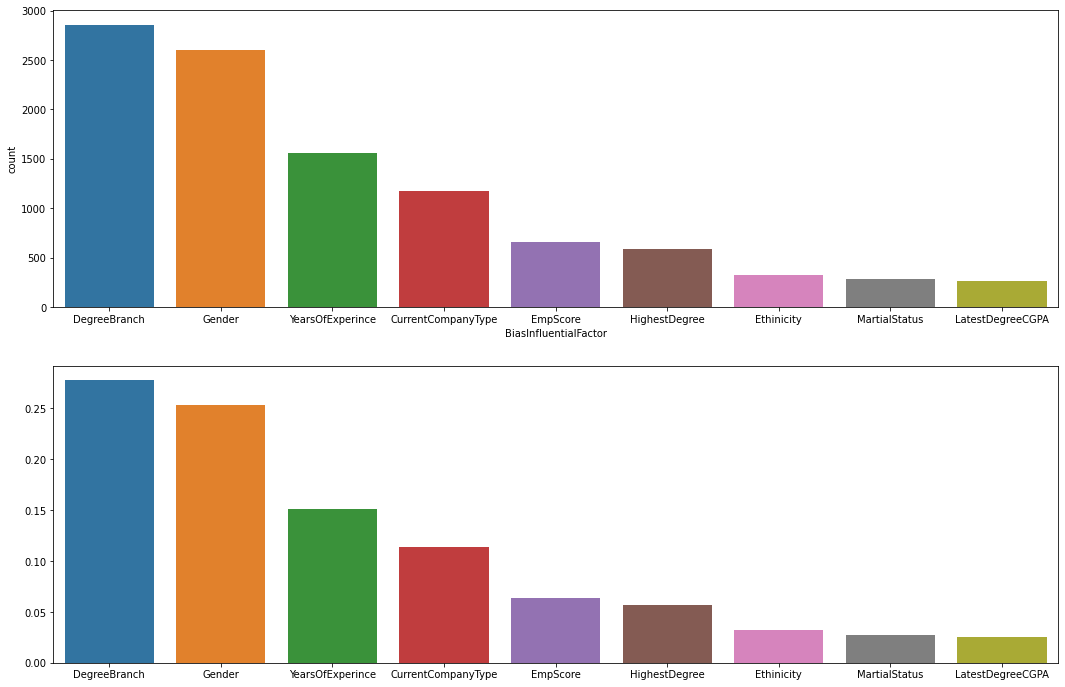

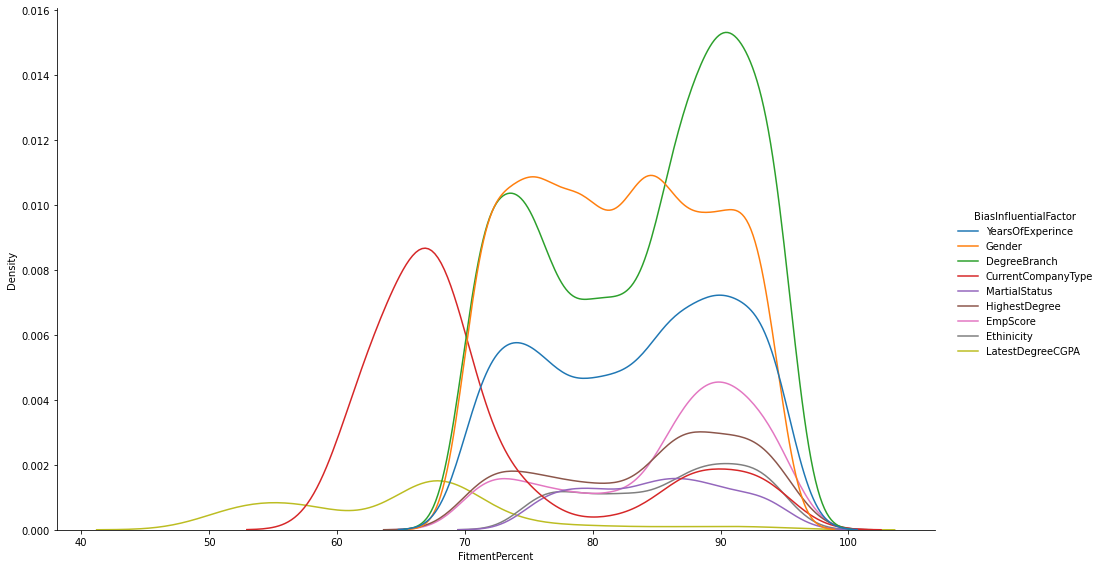

In [ ]:
print("Check different type of BiasInfluentialFactor \n")
display(train.BiasInfluentialFactor.unique())
display(len(train.BiasInfluentialFactor.unique()))

display(train.BiasInfluentialFactor.value_counts())
db_count = train.BiasInfluentialFactor.value_counts(normalize=True)
display(db_count)
fig, ax =plt.subplots(2, 1, figsize = (18,12))
sns.countplot(x="BiasInfluentialFactor", data=train, order=db_count.index, ax = ax[0])
sns.barplot(y=db_count.values, x = db_count.index, order=db_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="BiasInfluentialFactor", kind = "kde", height=8, aspect=10/6)

Check different type of GraduatingInstitute 



array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

3

Tier 2    6092
Tier 1    4793
Tier 3    2760
Name: GraduatingInstitute, dtype: int64

Tier 2    0.446464
Tier 1    0.351264
Tier 3    0.202272
Name: GraduatingInstitute, dtype: float64

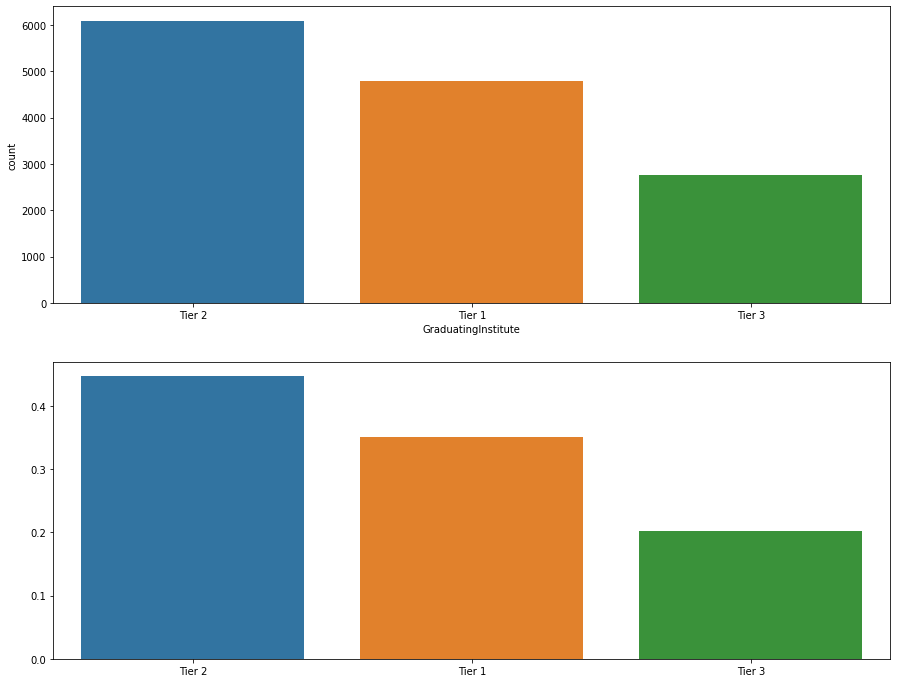

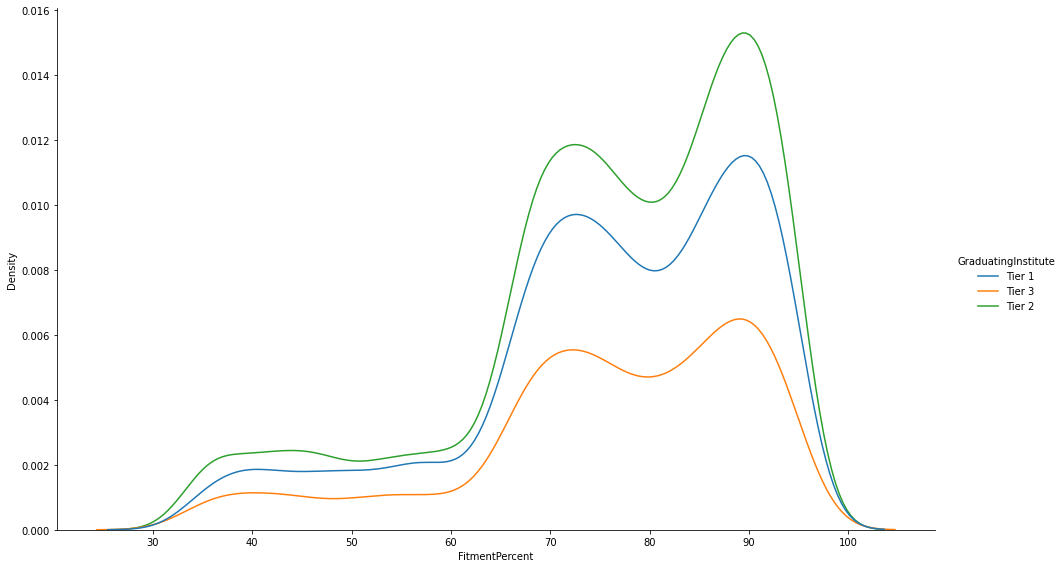

In [ ]:
print("Check different type of GraduatingInstitute \n")
display(train.GraduatingInstitute.unique())
display(len(train.GraduatingInstitute.unique()))

display(train.GraduatingInstitute.value_counts())
gi_count = train.GraduatingInstitute.value_counts(normalize=True)
display(gi_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="GraduatingInstitute", data=train, order=gi_count.index, ax = ax[0])
sns.barplot(y=gi_count.values, x = gi_count.index, order=gi_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="GraduatingInstitute", kind = "kde", height=8, aspect=10/6)

In [ ]:
pd.DataFrame({'GraduatingInstitute': train.GraduatingInstitute.value_counts().index, '#':train.GraduatingInstitute.value_counts().values, '%': train.GraduatingInstitute.value_counts(normalize=True).values.round(2)}) 

,GraduatingInstitute,#,%
0,Tier 2,6092,0.45
1,Tier 1,4793,0.35
2,Tier 3,2760,0.20


Maximum Application is from Tier 2 colleges

Check different type of LatestDegreeCGPA 



array([ 7,  6,  5,  8,  9,  4, 10])

7

7     4738
8     3480
6     1779
9     1554
5     1089
4      713
10     292
Name: LatestDegreeCGPA, dtype: int64

7     0.347233
8     0.255038
6     0.130377
9     0.113888
5     0.079809
4     0.052254
10    0.021400
Name: LatestDegreeCGPA, dtype: float64

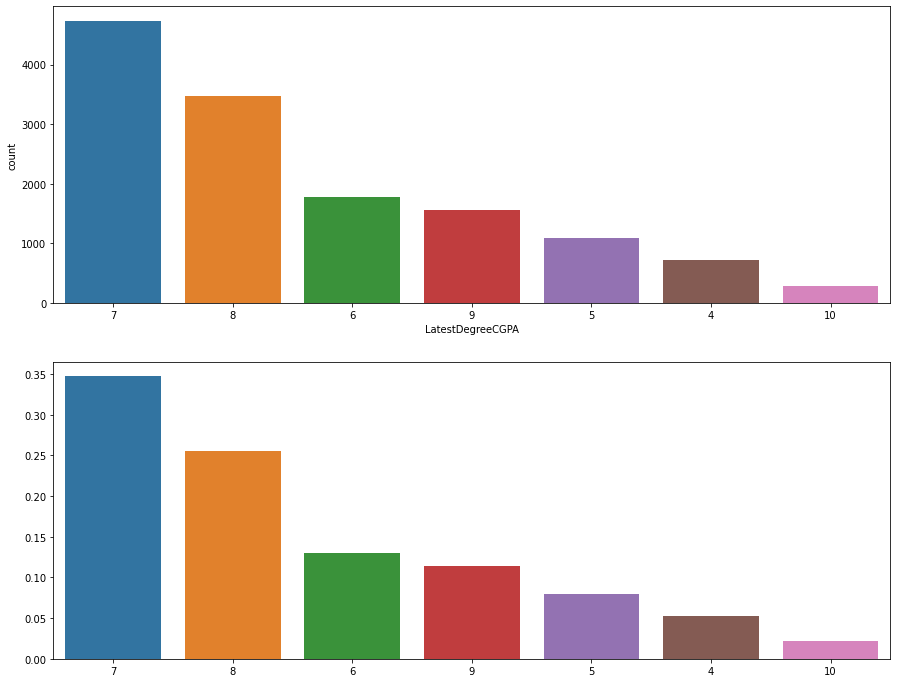

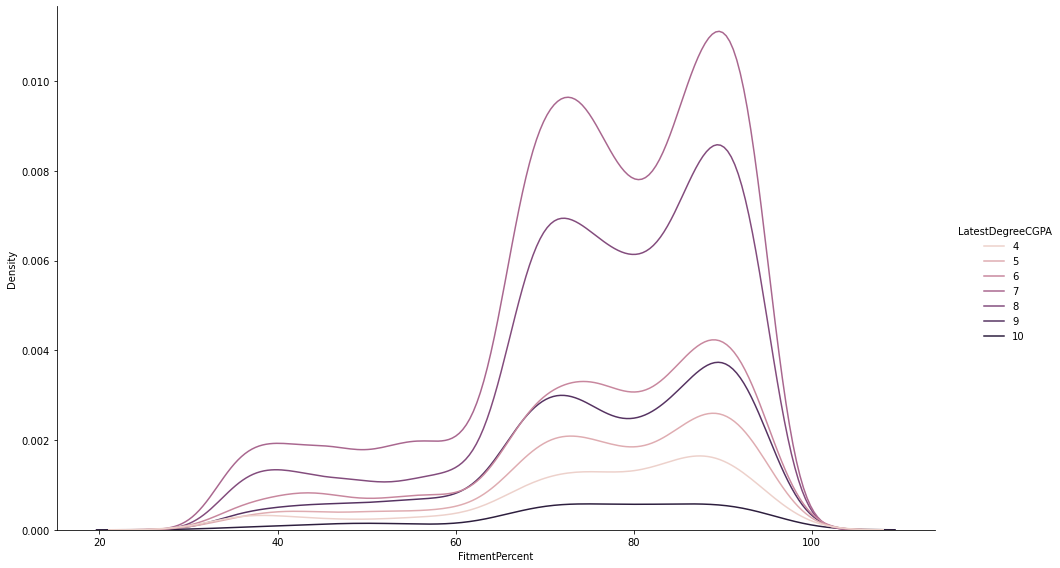

In [ ]:
print("Check different type of LatestDegreeCGPA \n")
display(train.LatestDegreeCGPA.unique())
display(len(train.LatestDegreeCGPA.unique()))

display(train.LatestDegreeCGPA.value_counts())
ldcgpa_count = train.LatestDegreeCGPA.value_counts(normalize=True)
display(ldcgpa_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="LatestDegreeCGPA", data=train, order=ldcgpa_count.index, ax = ax[0])
sns.barplot(y=ldcgpa_count.values, x = ldcgpa_count.index, order=ldcgpa_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="LatestDegreeCGPA", kind = "kde", height=8, aspect=10/6)

In [ ]:
pd.DataFrame({'LatestDegreeCGPA': train.LatestDegreeCGPA.value_counts().index, '#':train.LatestDegreeCGPA.value_counts().values, '%': train.LatestDegreeCGPA.value_counts(normalize=True).values.round(2)}) 

,LatestDegreeCGPA,#,%
0,7,4738,0.35
1,8,3480,0.26
2,6,1779,0.13
3,9,1554,0.11
4,5,1089,0.08
5,4,713,0.05
6,10,292,0.02


In [ ]:
train.LatestDegreeCGPA.mean()

7.100256504213998

Maximum candidate has a CGPA of 7 and very few percentage of people who applied for job has 4 or 10 CGPA

Check different type of YearsOfExperince 



array([12,  3,  6,  2,  1,  9,  8,  5,  4,  7, 11, 10])

12

9     1219
6     1196
11    1166
4     1146
5     1142
7     1130
12    1123
10    1116
8     1114
3     1109
2     1108
1     1076
Name: YearsOfExperince, dtype: int64

9     0.089337
6     0.087651
11    0.085453
4     0.083987
5     0.083694
7     0.082814
12    0.082301
10    0.081788
8     0.081642
3     0.081275
2     0.081202
1     0.078857
Name: YearsOfExperince, dtype: float64

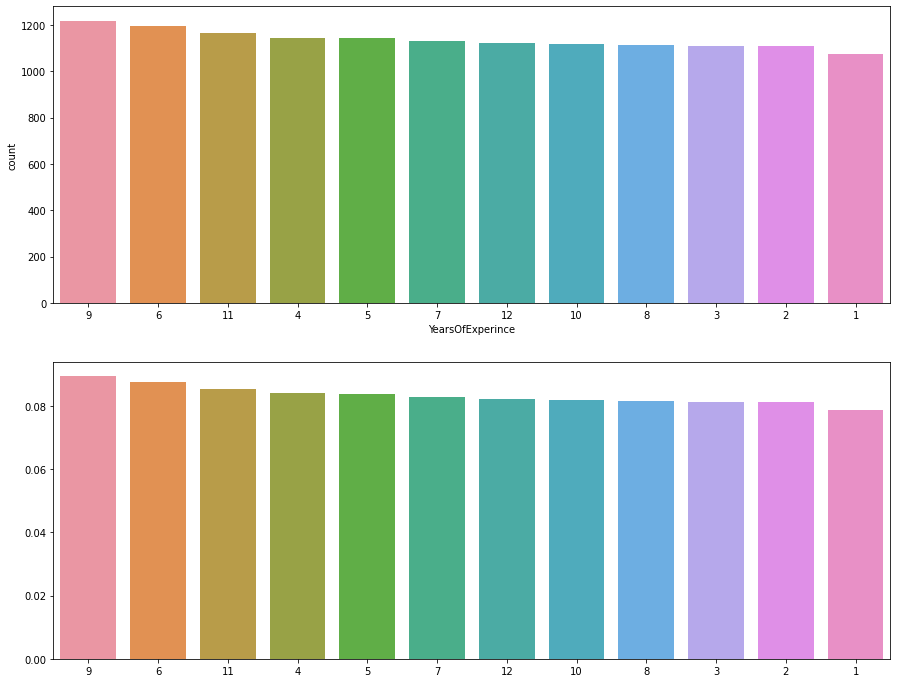

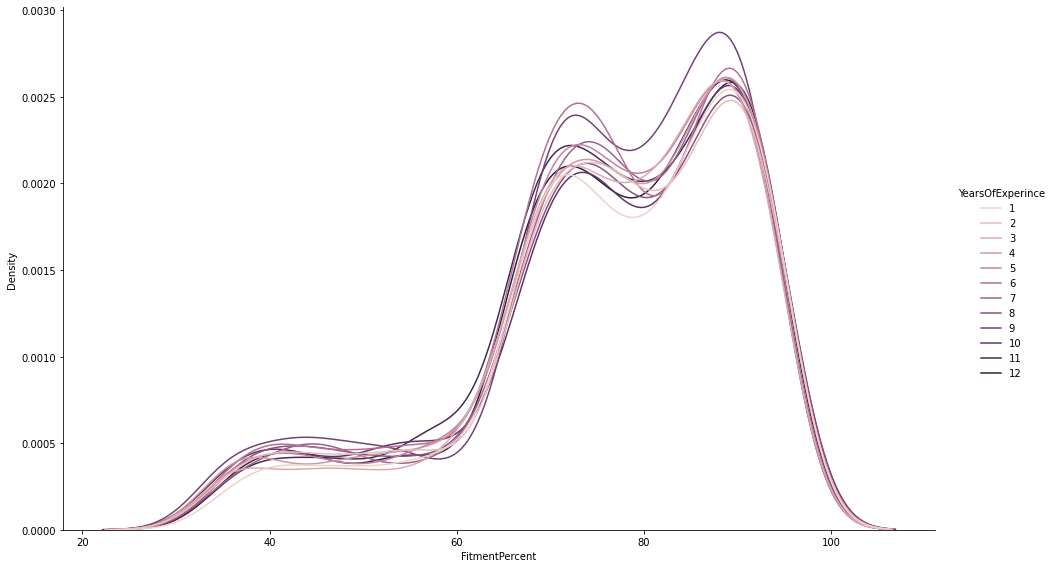

In [ ]:
print("Check different type of YearsOfExperince \n")
display(train.YearsOfExperince.unique())
display(len(train.YearsOfExperince.unique()))

display(train.YearsOfExperince.value_counts())
ldcgpa_count = train.YearsOfExperince.value_counts(normalize=True)
display(ldcgpa_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="YearsOfExperince", data=train, order=ldcgpa_count.index, ax = ax[0])
sns.barplot(y=ldcgpa_count.values, x = ldcgpa_count.index, order=ldcgpa_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="YearsOfExperince", kind = "kde", height=8, aspect=10/6)

In [ ]:
pd.DataFrame({'YearsOfExperince': train.YearsOfExperince.value_counts().index, '#':train.YearsOfExperince.value_counts().values, '%': train.YearsOfExperince.value_counts(normalize=True).values.round(3)}) 

,YearsOfExperince,#,%
0,9,1219,0.089
1,6,1196,0.088
2,11,1166,0.085
3,4,1146,0.084
4,5,1142,0.084
5,7,1130,0.083
6,12,1123,0.082
7,10,1116,0.082
8,8,1114,0.082
9,3,1109,0.081


In [ ]:
train.YearsOfExperince.mean()

6.547746427262734

The average experience of all the candidates who applied for the job is 6.55 years

Check different type of GraduationYear 



array([2009, 2018, 2015, 2019, 2020, 2012, 2013, 2016, 2017, 2014, 2010,
       2011])

12

2012    1219
2015    1196
2010    1166
2017    1146
2016    1142
2014    1130
2009    1123
2011    1116
2013    1114
2018    1109
2019    1108
2020    1076
Name: GraduationYear, dtype: int64

2012    0.089337
2015    0.087651
2010    0.085453
2017    0.083987
2016    0.083694
2014    0.082814
2009    0.082301
2011    0.081788
2013    0.081642
2018    0.081275
2019    0.081202
2020    0.078857
Name: GraduationYear, dtype: float64

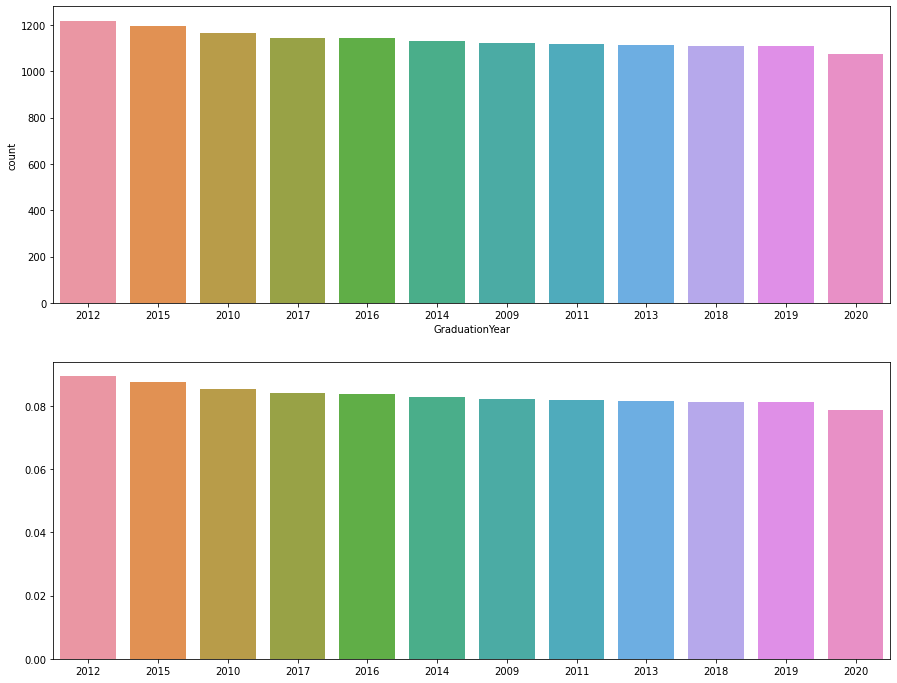

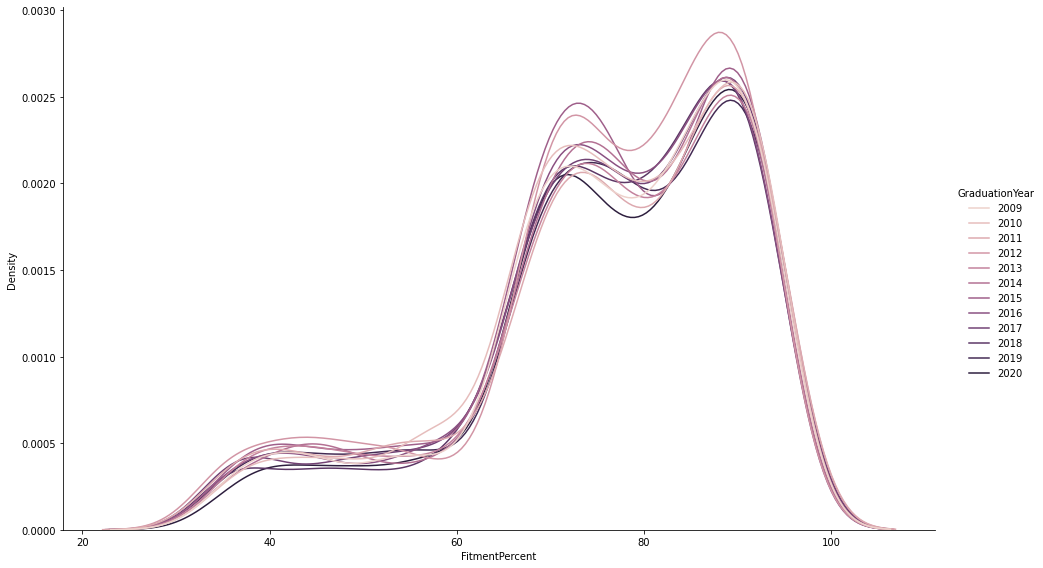

In [ ]:
print("Check different type of GraduationYear \n")
display(train.GraduationYear.unique())
display(len(train.GraduationYear.unique()))

display(train.GraduationYear.value_counts())
ldcgpa_count = train.GraduationYear.value_counts(normalize=True)
display(ldcgpa_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="GraduationYear", data=train, order=ldcgpa_count.index, ax = ax[0])
sns.barplot(y=ldcgpa_count.values, x = ldcgpa_count.index, order=ldcgpa_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="GraduationYear", kind = "kde", height=8, aspect=10/6)

Check different type of MartialStatus 



array(['Married', 'Single'], dtype=object)

2

Married    9810
Single     3835
Name: MartialStatus, dtype: int64

Married    0.718945
Single     0.281055
Name: MartialStatus, dtype: float64

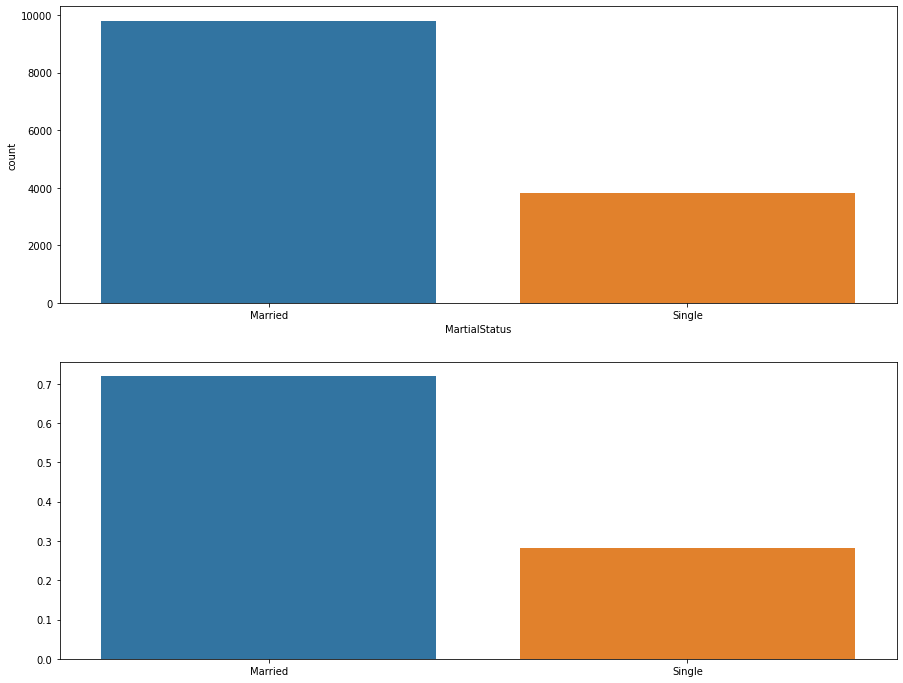

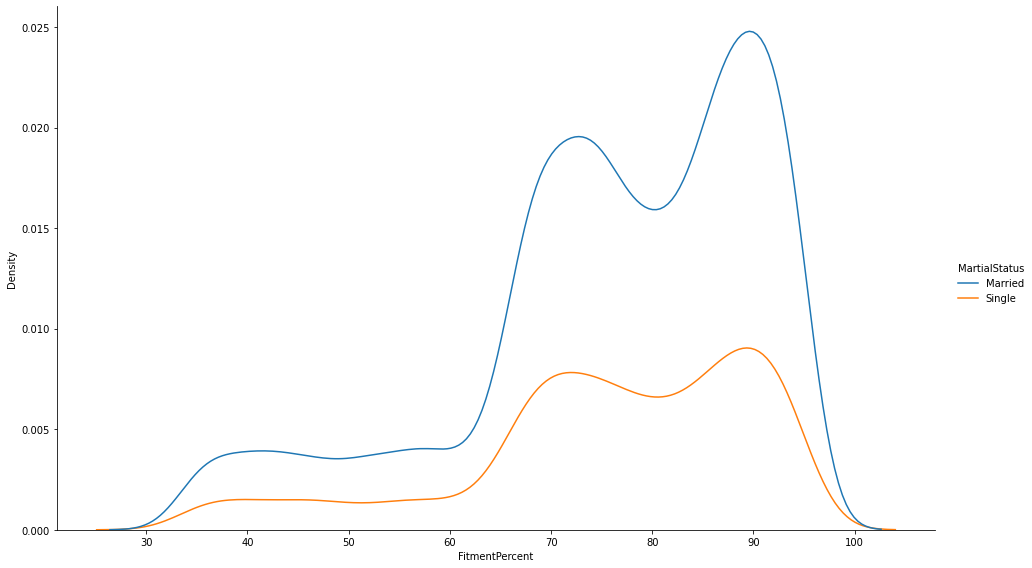

In [ ]:
print("Check different type of MartialStatus \n")
display(train.MartialStatus.unique())
display(len(train.MartialStatus.unique()))

display(train.MartialStatus.value_counts())
ldcgpa_count = train.MartialStatus.value_counts(normalize=True)
display(ldcgpa_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="MartialStatus", data=train, order=ldcgpa_count.index, ax = ax[0])
sns.barplot(y=ldcgpa_count.values, x = ldcgpa_count.index, order=ldcgpa_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="MartialStatus", kind = "kde", height=8, aspect=10/6)

In [ ]:
pd.DataFrame({'MartialStatus': train.MartialStatus.value_counts().index, '#':train.MartialStatus.value_counts().values, '%': train.MartialStatus.value_counts(normalize=True).values.round(2)}) 

,MartialStatus,#,%
0,Married,9810,0.72
1,Single,3835,0.28


The proportion of married candidate applied for job is more

Check different type of EmpScore 



array([5, 4, 3, 2, 1])

5

3    5462
4    4184
5    2025
2    1064
1     910
Name: EmpScore, dtype: int64

3    0.400293
4    0.306632
5    0.148406
2    0.077977
1    0.066691
Name: EmpScore, dtype: float64

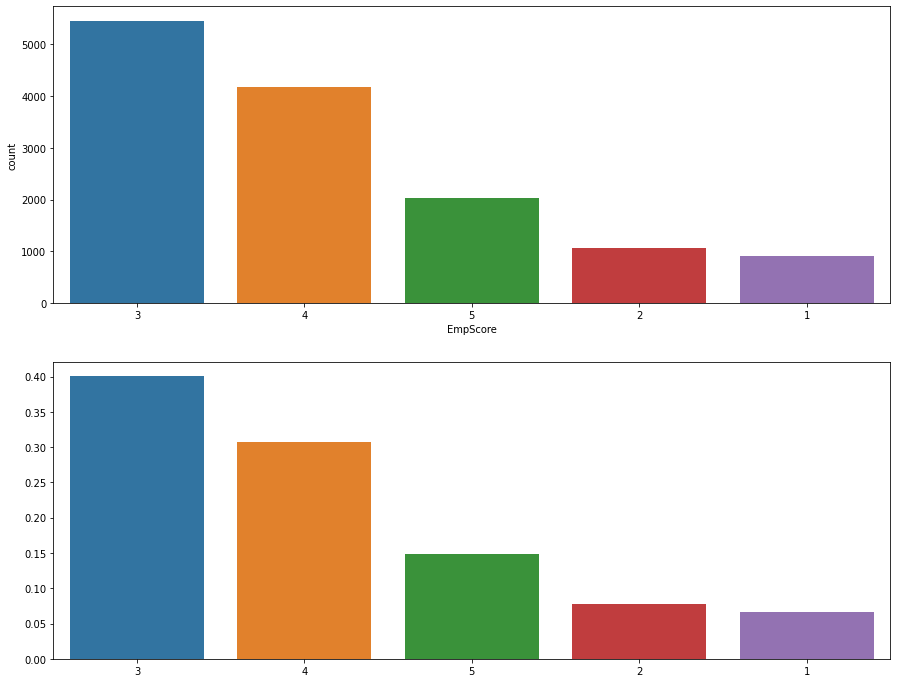

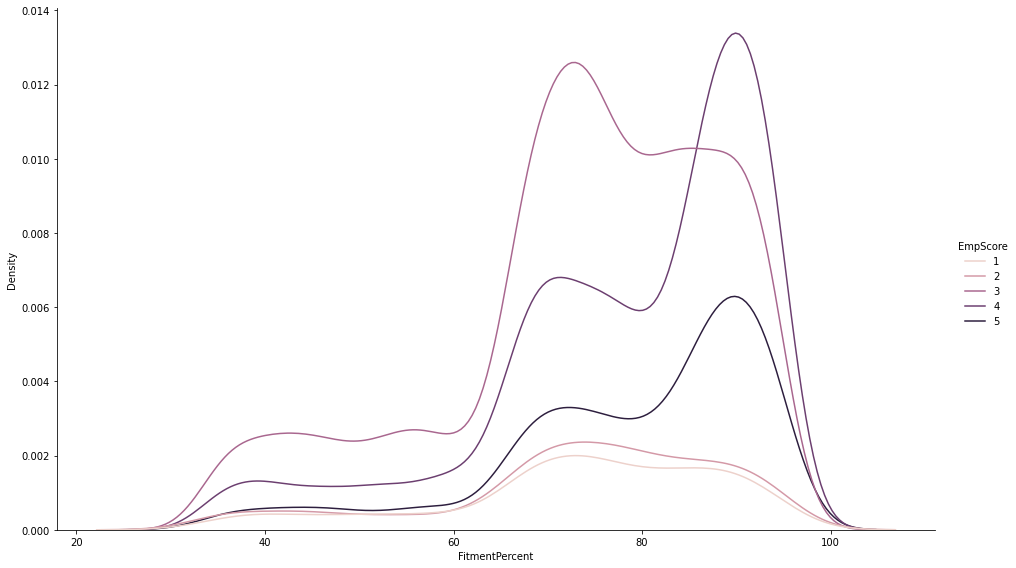

In [ ]:
print("Check different type of EmpScore \n")
display(train.EmpScore.unique())
display(len(train.EmpScore.unique()))

display(train.EmpScore.value_counts())
ldcgpa_count = train.EmpScore.value_counts(normalize=True)
display(ldcgpa_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="EmpScore", data=train, order=ldcgpa_count.index, ax = ax[0])
sns.barplot(y=ldcgpa_count.values, x = ldcgpa_count.index, order=ldcgpa_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="EmpScore", kind = "kde", height=8, aspect=10/6)

In [ ]:
display(pd.DataFrame({'EmpScore': train.EmpScore.value_counts().index, '#':train.EmpScore.value_counts().values, '%': train.EmpScore.value_counts(normalize=True).values.round(2)}) )
display(train.EmpScore.mean())

,EmpScore,#,%
0,3,5462,0.40
1,4,4184,0.31
2,5,2025,0.15
3,2,1064,0.08
4,1,910,0.07


3.392085012825211

Maximum recommendation score are average which is 3

Check different type of CurrentDesignation 



array(['SSE', 'BA', 'SDE', 'DS', 'EM', 'DA', 'SEM', 'DE'], dtype=object)

8

SDE    5423
SSE    2745
DS     1716
BA     1710
EM     1342
SEM     287
DA      287
DE      135
Name: CurrentDesignation, dtype: int64

SDE    0.397435
SSE    0.201173
DS     0.125760
BA     0.125321
EM     0.098351
SEM    0.021033
DA     0.021033
DE     0.009894
Name: CurrentDesignation, dtype: float64

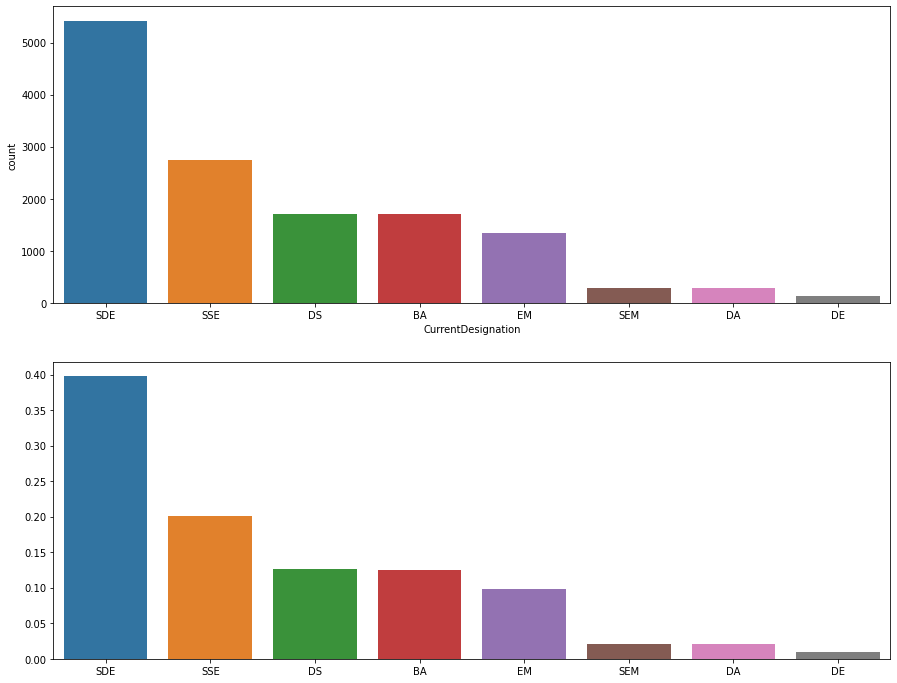

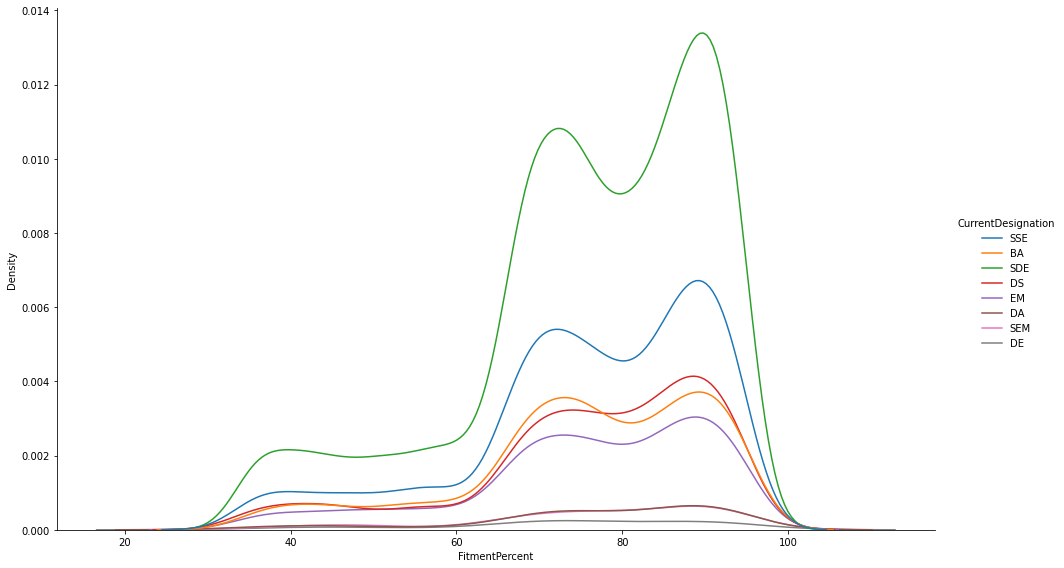

In [ ]:
print("Check different type of CurrentDesignation \n")
display(train.CurrentDesignation.unique())
display(len(train.CurrentDesignation.unique()))

display(train.CurrentDesignation.value_counts())
ldcgpa_count = train.CurrentDesignation.value_counts(normalize=True)
display(ldcgpa_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="CurrentDesignation", data=train, order=ldcgpa_count.index, ax = ax[0])
sns.barplot(y=ldcgpa_count.values, x = ldcgpa_count.index, order=ldcgpa_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="CurrentDesignation", kind = "kde", height=8, aspect=10/6)

In [ ]:
display(pd.DataFrame({'CurrentDesignation': train.CurrentDesignation.value_counts().index, '#':train.CurrentDesignation.value_counts().values, '%': train.CurrentDesignation.value_counts(normalize=True).values.round(2)}) )

,CurrentDesignation,#,%
0,SDE,5423,0.40
1,SSE,2745,0.20
2,DS,1716,0.13
3,BA,1710,0.13
4,EM,1342,0.10
5,SEM,287,0.02
6,DA,287,0.02
7,DE,135,0.01


Maximum candidate current designation are related to Software Development which is around 60%

Check different type of CurrentCompanyType 



array(['Enterprise', 'MidSized', 'Startup'], dtype=object)

3

Startup       6373
Enterprise    4395
MidSized      2877
Name: CurrentCompanyType, dtype: int64

Startup       0.467058
Enterprise    0.322096
MidSized      0.210846
Name: CurrentCompanyType, dtype: float64

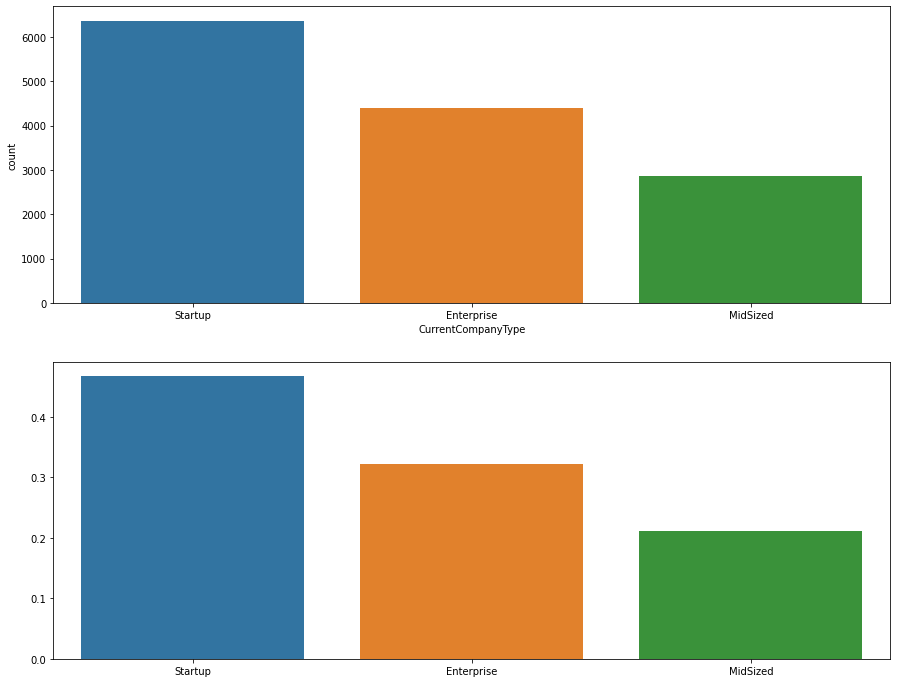

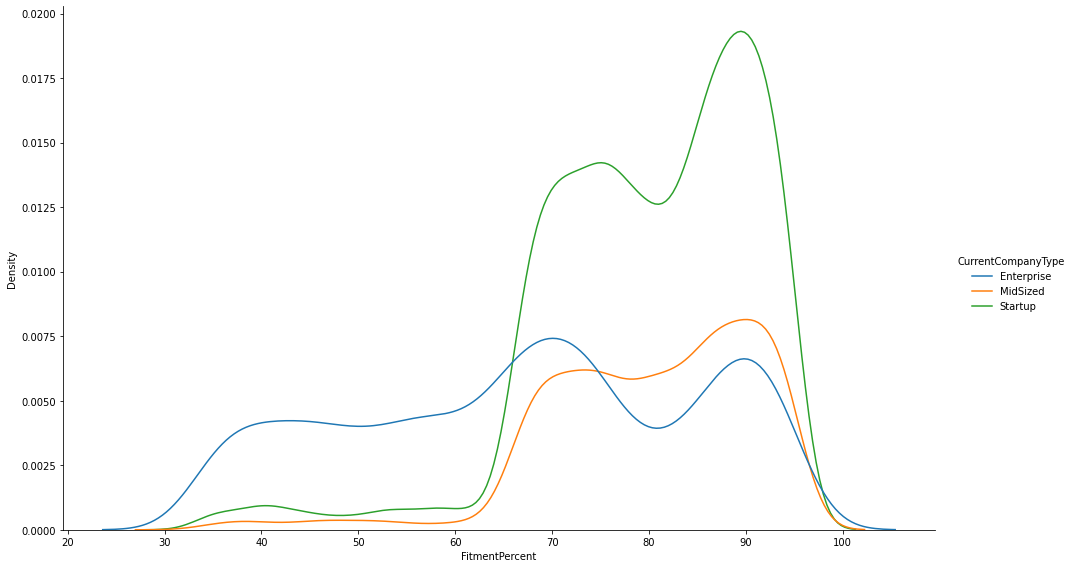

In [ ]:
print("Check different type of CurrentCompanyType \n")
display(train.CurrentCompanyType.unique())
display(len(train.CurrentCompanyType.unique()))

display(train.CurrentCompanyType.value_counts())
ldcgpa_count = train.CurrentCompanyType.value_counts(normalize=True)
display(ldcgpa_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="CurrentCompanyType", data=train, order=ldcgpa_count.index, ax = ax[0])
sns.barplot(y=ldcgpa_count.values, x = ldcgpa_count.index, order=ldcgpa_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="CurrentCompanyType", kind = "kde", height=8, aspect=10/6)

In [ ]:
display(pd.DataFrame({'CurrentCompanyType': train.CurrentCompanyType.value_counts().index, '#':train.CurrentCompanyType.value_counts().values, '%': train.CurrentCompanyType.value_counts(normalize=True).values.round(2)}) )

,CurrentCompanyType,#,%
0,Startup,6373,0.47
1,Enterprise,4395,0.32
2,MidSized,2877,0.21


Most of the candidates are from startup we can get more data from asking question and analyse why people want to switch jobs from startup

Check different type of DepartmentInCompany 



array(['Design', 'Engineering', 'Product', 'Customer Success', 'Finance'],
      dtype=object)

5

Engineering         5749
Design              4393
Customer Success    1570
Product             1232
Finance              701
Name: DepartmentInCompany, dtype: int64

Engineering         0.421326
Design              0.321949
Customer Success    0.115060
Product             0.090289
Finance             0.051374
Name: DepartmentInCompany, dtype: float64

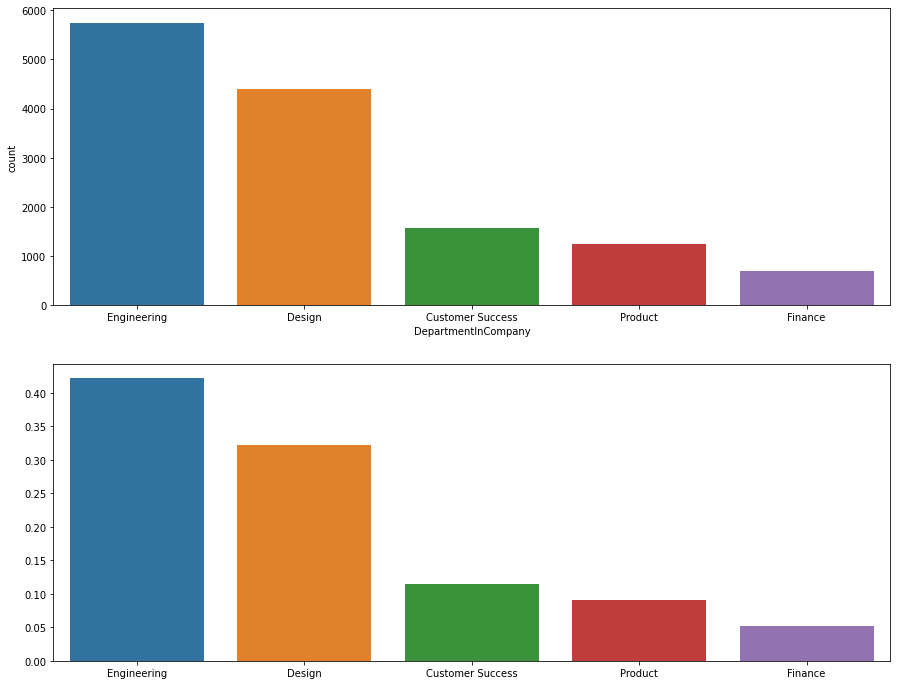

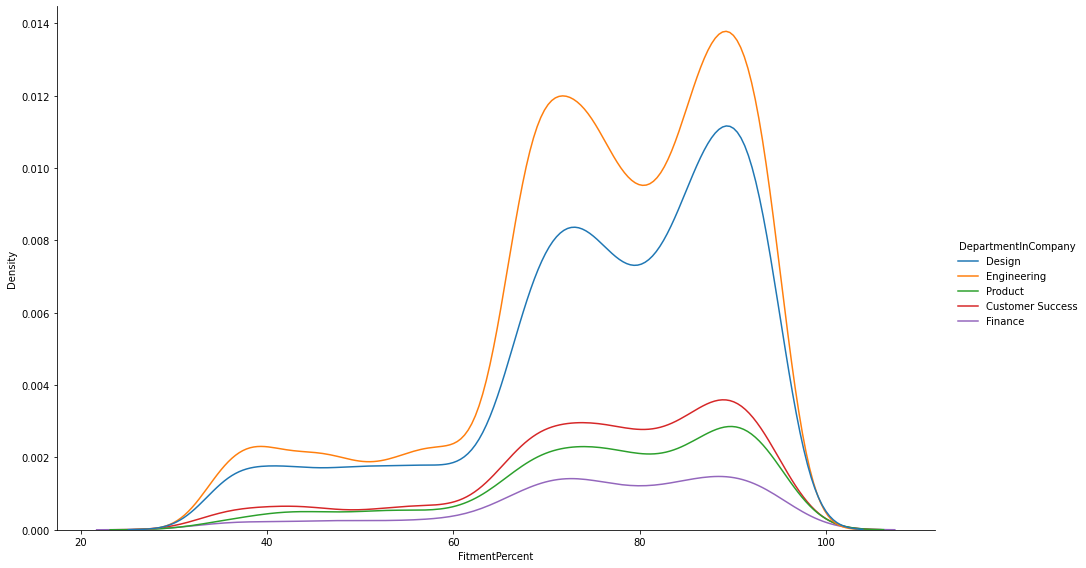

In [ ]:
print("Check different type of DepartmentInCompany \n")
display(train.DepartmentInCompany.unique())
display(len(train.DepartmentInCompany.unique()))

display(train.DepartmentInCompany.value_counts())
ldcgpa_count = train.DepartmentInCompany.value_counts(normalize=True)
display(ldcgpa_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="DepartmentInCompany", data=train, order=ldcgpa_count.index, ax = ax[0])
sns.barplot(y=ldcgpa_count.values, x = ldcgpa_count.index, order=ldcgpa_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="DepartmentInCompany", kind = "kde", height=8, aspect=10/6)

In [ ]:
display(pd.DataFrame({'DepartmentInCompany': train.DepartmentInCompany.value_counts().index, '#':train.DepartmentInCompany.value_counts().values, '%': train.DepartmentInCompany.value_counts(normalize=True).values.round(2)}) )

,DepartmentInCompany,#,%
0,Engineering,5749,0.42
1,Design,4393,0.32
2,Customer Success,1570,0.12
3,Product,1232,0.09
4,Finance,701,0.05


Mostly candidates are working as Engineer very few people are working in Finance and Product department

Check different type of TotalLeavesTaken 



array([20,  6, 19, 16, 10,  8, 18,  7,  5, 12,  9, 14, 11, 15, 13,  4, 17])

17

11    861
6     856
13    842
4     827
12    818
20    812
14    802
19    802
10    794
18    792
9     792
8     792
5     787
15    781
17    773
16    762
7     752
Name: TotalLeavesTaken, dtype: int64

11    0.063100
6     0.062734
13    0.061708
4     0.060608
12    0.059949
20    0.059509
14    0.058776
19    0.058776
10    0.058190
18    0.058043
9     0.058043
8     0.058043
5     0.057677
15    0.057237
17    0.056651
16    0.055845
7     0.055112
Name: TotalLeavesTaken, dtype: float64

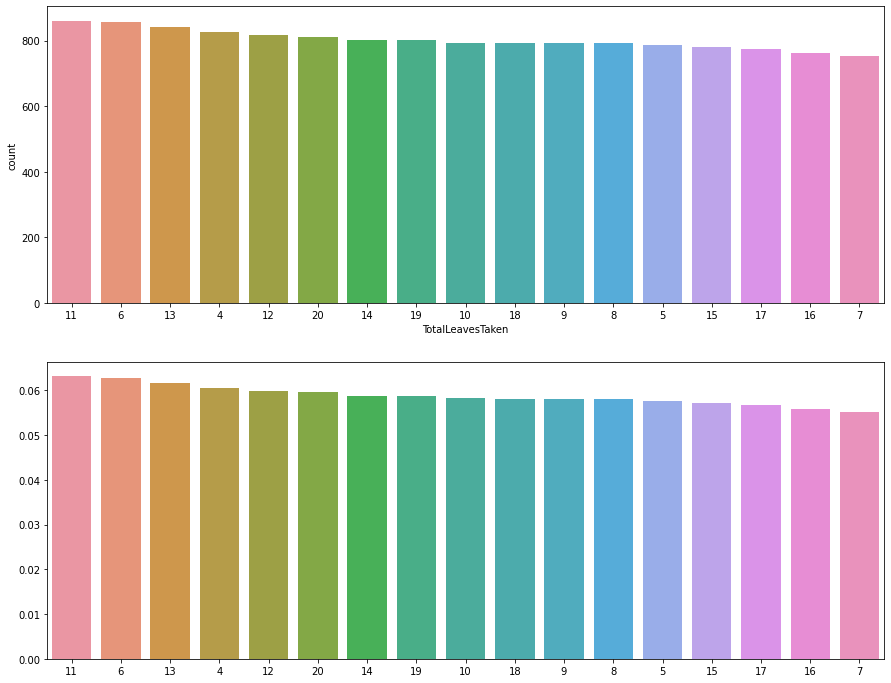

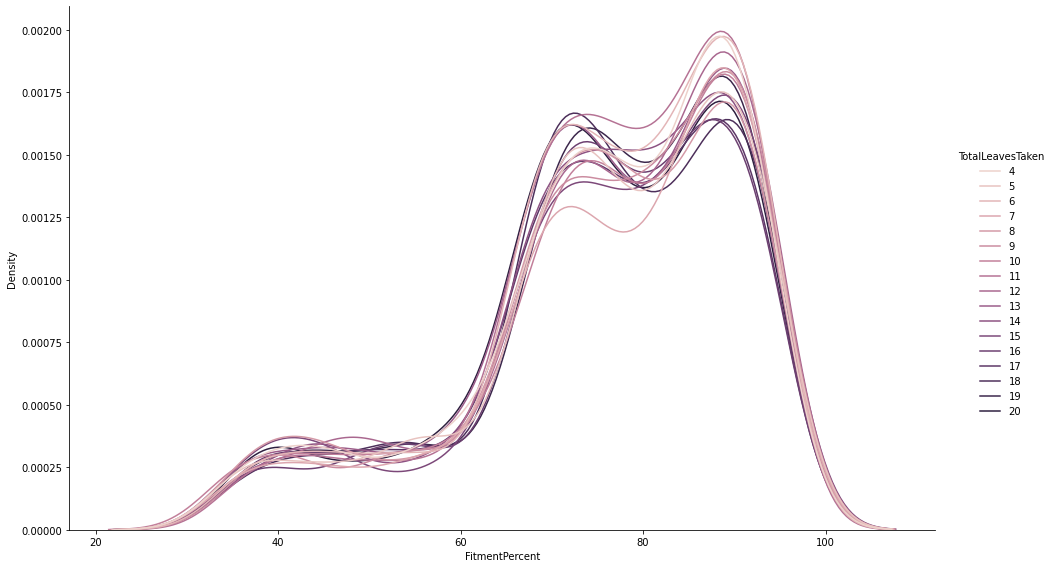

In [ ]:
print("Check different type of TotalLeavesTaken \n")
display(train.TotalLeavesTaken.unique())
display(len(train.TotalLeavesTaken.unique()))

display(train.TotalLeavesTaken.value_counts())
ldcgpa_count = train.TotalLeavesTaken.value_counts(normalize=True)
display(ldcgpa_count)
fig, ax =plt.subplots(2, 1, figsize = (15,12))
sns.countplot(x="TotalLeavesTaken", data=train, order=ldcgpa_count.index, ax = ax[0])
sns.barplot(y=ldcgpa_count.values, x = ldcgpa_count.index, order=ldcgpa_count.index, ax = ax[1])

sns.displot(train, x="FitmentPercent", hue="TotalLeavesTaken", kind = "kde", height=8, aspect=10/6)

In [ ]:
display(pd.DataFrame({'TotalLeavesTaken': train.TotalLeavesTaken.value_counts().index, '#':train.TotalLeavesTaken.value_counts().values, '%': train.TotalLeavesTaken.value_counts(normalize=True).values.round(2)}) )

,TotalLeavesTaken,#,%
0,11,861,0.06
1,6,856,0.06
2,13,842,0.06
3,4,827,0.06
4,12,818,0.06
5,20,812,0.06
6,14,802,0.06
7,19,802,0.06
8,10,794,0.06
9,18,792,0.06


Dropping below columns

1. EmpID
2. EmpName
3. GraduationYear -> (Same as YearsOfExperince highly co-related)
4. BiasInfluentialFactor


In [ ]:
train_df = train.drop(["EmpID", "EmpName", "GraduationYear", "BiasInfluentialFactor"], axis = 1)
test_df = test.drop(["EmpID", "EmpName", "GraduationYear"], axis = 1)

In [ ]:
train_df.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,FitmentPercent
0,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,21,26,Married,5,SSE,Enterprise,Design,20,95.40
1,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,15,19,Married,5,BA,MidSized,Engineering,6,67.09
2,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,15,24,Single,5,SDE,MidSized,Engineering,19,91.26
3,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,16,24,Married,5,SDE,Startup,Product,16,72.29
4,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,24,32,Married,5,SDE,Enterprise,Engineering,10,86.34


Perform Dummy Coding

In [ ]:
train_df_with_dummy_coding = pd.get_dummies(train_df, drop_first=True)
test_df_with_dummy_coding = pd.get_dummies(test_df, drop_first=True)

In [ ]:
train_df_with_dummy_coding.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,MartialStatus_Single,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,35,7,12,21,26,5,20,95.40,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,26,7,3,15,19,5,6,67.09,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,36,6,6,15,24,5,19,91.26,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
3,29,5,6,16,24,5,16,72.29,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,25,8,2,24,32,5,10,86.34,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
test_df_with_dummy_coding.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,MartialStatus_Single,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,35,5,5,27,34,4,18,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,35,9,12,29,33,4,8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,28,9,2,18,25,3,18,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,37,8,11,7,12,5,17,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,36,7,6,22,32,4,9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


Train/Test/Validation

In [ ]:
X = train_df_with_dummy_coding.drop(["FitmentPercent"], axis=1)
y = train_df_with_dummy_coding.FitmentPercent

With original Data without standardise

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


In [ ]:
X_train.shape

(8187, 47)

In [ ]:
reg_model = sm.OLS(y_train, X_train).fit()

In [ ]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         FitmentPercent   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        06:51:05   Log-Likelihood:                -31780.
No. Observations:                8187   AIC:                         6.365e+04
Df Residuals:                    8140   BIC:                         6.398e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Age                                         2.5852      0.069     37.372      0.000       2.450       2.721
LatestDegreeCGPA                            0.0175      0.096      0.182      0.855      -0.171       0.206
YearsOfExperince                           -2.6489      0.084    -31.436      0.000      -2.814      -2.484
CurrentCTC                                  0.2854      0.067      4.259      0.000       0.154       0.417
ExpectedCTC                                 0.0148      0.065      0.230      0.818      -0.112       0.141
EmpScore                                    2.1410      0.125     17.077      0.000       1.895       2.387
TotalLeavesTaken                           -0.0483      0.027     -1.816      0.069      -0.100       0.004
LanguageOfCommunication_Hindi              -0.0545      0.283     -0.193      0.847      -0.608       0.499
LanguageOfCommunication_Native              0.1465      0.441      0.332      0.740      -0.717       1.010
Gender_Male                                -3.5363      0.286    -12.381      0.000      -4.096      -2.976
Gender_Other                              -25.1885      0.546    -46.103      0.000     -26.259     -24.117
JobProfileIDApplyingFor_JR79193             0.5011      1.138      0.440      0.660      -1.730       2.733
JobProfileIDApplyingFor_JR81165            -1.4309      1.134     -1.262      0.207      -3.653       0.791
JobProfileIDApplyingFor_JR85289            -0.8922      0.999     -0.893      0.372      -2.850       1.066
JobProfileIDApplyingFor_JR87525            -0.3884      1.007     -0.386      0.700      -2.363       1.586
JobProfileIDApplyingFor_JR88654            -2.2752      1.212     -1.877      0.061      -4.652       0.101
JobProfileIDApplyingFor_JR88873            -0.0442      1.076     -0.041      0.967      -2.153       2.065
JobProfileIDApplyingFor_JR88879             0.1334      1.062      0.126      0.900      -1.949       2.216
JobProfileIDApplyingFor_JR89890            -1.4460      1.070     -1.351      0.177      -3.544       0.652
HighestDegree_BCA                           0.1123      0.430      0.261      0.794      -0.731       0.956
HighestDegree_Dual M.Tech                  -0.0346      0.463     -0.075      0.941      -0.943       0.874
HighestDegree_Dual MBA                     -0.4000      0.620     -0.645      0.519      -1.616       0.816
HighestDegree_M.Tech                       -7.5176      0.452    -16.625      0.000      -8.404      -6.631
HighestDegree_MCA                          -9.3002      1.319     -7.050      0.000     -11.886      -6.714
HighestDegree_MS                           -7.5940      0.495    -15.342      0.000      -8.564      -6.624
HighestDegree_PhD                         -18.6781      0.8

With Standardise Data

In [ ]:
scale_col = train_df_with_dummy_coding.iloc[:, 0:7]
scale_col_test = test_df_with_dummy_coding.iloc[:, 0:7]

In [ ]:
scaler = StandardScaler()
scaler.fit(scale_col.values)
X_scaled = scaler.transform(scale_col.values)
X_scaled_test = scaler.transform(scale_col_test)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=scale_col.columns)
X_scaled_df_test = pd.DataFrame(X_scaled_test, columns=scale_col_test.columns)

In [ ]:
X_scaled_df.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken
0,1.110151,-0.074458,1.591065,0.405536,0.125506,1.539209,1.640168
1,-1.208698,-0.074458,-1.035296,-0.426888,-0.810593,1.539209,-1.218342
2,1.367801,-0.817130,-0.159842,-0.426888,-0.141951,1.539209,1.435989
3,-0.435748,-1.559802,-0.159842,-0.288151,-0.141951,1.539209,0.823451
4,-1.466348,0.668214,-1.327114,0.821748,0.927876,1.539209,-0.401625


In [ ]:
X_final = X_scaled_df.join(train_df_with_dummy_coding.iloc[:, 8:])
X_final_test = X_scaled_df_test.join(test_df_with_dummy_coding.iloc[:,7:])

In [ ]:
X_final.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,MartialStatus_Single,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,1.110151,-0.074458,1.591065,0.405536,0.125506,1.539209,1.640168,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,-1.208698,-0.074458,-1.035296,-0.426888,-0.810593,1.539209,-1.218342,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1.367801,-0.817130,-0.159842,-0.426888,-0.141951,1.539209,1.435989,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
3,-0.435748,-1.559802,-0.159842,-0.288151,-0.141951,1.539209,0.823451,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,-1.466348,0.668214,-1.327114,0.821748,0.927876,1.539209,-0.401625,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
X_final_test.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,MartialStatus_Single,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,1.110151,-1.559802,-0.451660,1.237960,1.195333,0.581939,1.231809,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1.110151,1.410886,1.591065,1.515435,1.061604,0.581939,-0.809983,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.693398,1.410886,-1.327114,-0.010676,-0.008223,-0.375331,1.231809,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,1.625451,0.668214,1.299247,-1.536787,-1.746691,1.539209,1.027630,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1.367801,-0.074458,-0.159842,0.544273,0.927876,0.581939,-0.605804,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_final, y, test_size=0.2, random_state=1)

X_train_std, X_val_std, y_train_std, y_val_std = train_test_split(X_train_std, y_train_std, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
reg_model_std = sm.OLS(y_train_std, X_train_std).fit()

In [ ]:
reg_model_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         FitmentPercent   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        06:51:05   Log-Likelihood:                -31780.
No. Observations:                8187   AIC:                         6.365e+04
Df Residuals:                    8140   BIC:                         6.398e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Age                                      -242.2886      4.065    -59.598      0.000    -250.258    -234.319
LatestDegreeCGPA                            0.0236      0.129      0.182      0.855      -0.230       0.277
YearsOfExperince                          213.7018      3.593     59.475      0.000     206.658     220.745
CurrentCTC                                  2.0570      0.483      4.259      0.000       1.110       3.004
ExpectedCTC                                 0.1109      0.483      0.230      0.818      -0.836       1.058
EmpScore                                    2.2365      0.131     17.077      0.000       1.980       2.493
TotalLeavesTaken                           -0.2363      0.130     -1.816      0.069      -0.491       0.019
LanguageOfCommunication_Hindi              -0.0545      0.283     -0.193      0.847      -0.608       0.499
LanguageOfCommunication_Native              0.1465      0.441      0.332      0.740      -0.717       1.010
Gender_Male                                -3.5363      0.286    -12.381      0.000      -4.096      -2.976
Gender_Other                              -25.1885      0.546    -46.103      0.000     -26.259     -24.117
JobProfileIDApplyingFor_JR79193             0.5011      1.138      0.440      0.660      -1.730       2.733
JobProfileIDApplyingFor_JR81165            -1.4309      1.134     -1.262      0.207      -3.653       0.791
JobProfileIDApplyingFor_JR85289            -0.8922      0.999     -0.893      0.372      -2.850       1.066
JobProfileIDApplyingFor_JR87525            -0.3884      1.007     -0.386      0.700      -2.363       1.586
JobProfileIDApplyingFor_JR88654            -2.2752      1.212     -1.877      0.061      -4.652       0.101
JobProfileIDApplyingFor_JR88873            -0.0442      1.076     -0.041      0.967      -2.153       2.065
JobProfileIDApplyingFor_JR88879             0.1334      1.062      0.126      0.900      -1.949       2.216
JobProfileIDApplyingFor_JR89890            -1.4460      1.070     -1.351      0.177      -3.544       0.652
HighestDegree_BCA                           0.1123      0.430      0.261      0.794      -0.731       0.956
HighestDegree_Dual M.Tech                  -0.0346      0.463     -0.075      0.941      -0.943       0.874
HighestDegree_Dual MBA                     -0.4000      0.620     -0.645      0.519      -1.616       0.816
HighestDegree_M.Tech                      187.5149      3.136     59.786      0.000     181.367     193.663
HighestDegree_MCA                         185.7324      3.371     55.095      0.000     179.124     192.341
HighestDegree_MS                          187.4386      3.143     59.637      0.000     181.278     193.600
HighestDegree_PhD                         436.3979      7.3

In [ ]:
skl_regression = LinearRegression()

In [ ]:
skl_regression.fit(X_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
skl_reg_pred = skl_regression.predict(X_test_std)
# The coefficients
print('Coefficients: \n', skl_regression.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_std, skl_reg_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test_std, skl_reg_pred))

Coefficients: 
 [-3.11534144e-01  2.36224856e-02  5.70265748e-02  2.05695659e+00
  1.10859550e-01  2.23654789e+00 -2.36317568e-01 -5.45062348e-02
  1.46522379e-01 -3.53626201e+00 -2.51884705e+01  5.01113234e-01
 -1.43092440e+00 -8.92210706e-01 -3.88426230e-01 -2.27515586e+00
 -4.41917633e-02  1.33364196e-01 -1.44601390e+00  1.12285842e-01
 -3.45776686e-02 -4.00015344e-01  4.78834891e-01 -1.30368822e+00
  4.02516235e-01 -1.96492374e-02  2.70798941e-02 -4.11231332e-01
  7.79843274e-01 -3.59572579e-01 -1.16581462e-01  7.56044907e-03
 -2.15625778e-01 -5.69191609e-01  1.35474845e+00  5.32160773e-01
  6.32146879e-01  4.60897224e-01  6.20527568e-01  2.32898506e-01
  1.04747082e+00  1.32551273e+01  1.27983778e+01  9.38890601e-02
 -1.48289765e-01  8.37746576e-01  5.26400419e-01]
Mean squared error: 145.65
Coefficient of determination: 0.35


In [ ]:
skl_reg_pred_val = skl_regression.predict(X_val_std)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_val_std, skl_reg_pred_val))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_val_std, skl_reg_pred_val))

Mean squared error: 143.41
Coefficient of determination: 0.35


In [ ]:
scores = cross_val_score(skl_regression, X_train, y_train, scoring='r2', cv=5)
scores

array([0.32989889, 0.34423871, 0.37422898, 0.40879273, 0.37848455])

In [ ]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(skl_regression, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.37241098, 0.36934337, 0.37225999, 0.37299225, 0.35955432])

In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 47))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 46 candidates, totalling 230 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 230 out of 230 | elapsed:   58.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.316177,0.016350,0.002180,0.000106,1,{'n_features_to_select': 1},0.145987,0.161836,0.167514,0.144221,0.163508,0.156613,0.009593,46,0.160094,0.155949,0.154658,0.160438,0.155497,0.157327,0.002437
1,0.353056,0.023453,0.002368,0.000498,2,{'n_features_to_select': 2},0.170712,0.183339,0.185309,0.171468,0.184712,0.179108,0.006582,45,0.182181,0.178851,0.178486,0.181804,0.178460,0.179957,0.001672
2,0.324813,0.016007,0.002160,0.000012,3,{'n_features_to_select': 3},0.325188,0.322404,0.311507,0.320513,0.309738,0.317870,0.006127,44,0.317253,0.317995,0.320777,0.318235,0.320808,0.319014,0.001488
3,0.333677,0.011882,0.002157,0.000034,4,{'n_features_to_select': 4},0.333216,0.331625,0.325493,0.334378,0.318959,0.328734,0.005768,43,0.328999,0.329395,0.330969,0.328427,0.332201,0.329998,0.001388
4,0.322965,0.016797,0.002127,0.000025,5,{'n_features_to_select': 5},0.355067,0.331616,0.325404,0.334082,0.343899,0.338013,0.010400,42,0.351884,0.329620,0.331214,0.328719,0.354351,0.339158,0.011453
5,0.323684,0.007287,0.003070,0.001751,6,{'n_features_to_select': 6},0.355140,0.355279,0.348064,0.354740,0.341704,0.350985,0.005376,25,0.352381,0.352100,0.353932,0.351981,0.355161,0.353111,0.001242
6,0.339564,0.019935,0.005142,0.002487,7,{'n_features_to_select': 7},0.355467,0.354471,0.348620,0.354257,0.342345,0.351032,0.004963,24,0.352517,0.352182,0.354289,0.352583,0.355480,0.353410,0.001268
7,0.322453,0.018493,0.004021,0.002186,8,{'n_features_to_select': 8},0.354669,0.353828,0.348290,0.353407,0.342846,0.350608,0.004479,27,0.352609,0.352370,0.354537,0.352684,0.355549,0.353550,0.001265
8,0.334014,0.016868,0.003867,0.001955,9,{'n_features_to_select': 9},0.354056,0.354806,0.349051,0.353392,0.343215,0.350904,0.004334,26,0.352797,0.352610,0.354715,0.352868,0.355639,0.353726,0.001223
9,0.314874,0.008473,0.003947,0.002025,10,{'n_features_to_select': 10},0.352010,0.353464,0.349480,0.353521,0.343297,0.350354,0.003821,29,0.353034,0.352958,0.354910,0.353010,0.355686,0.353920,0.001152


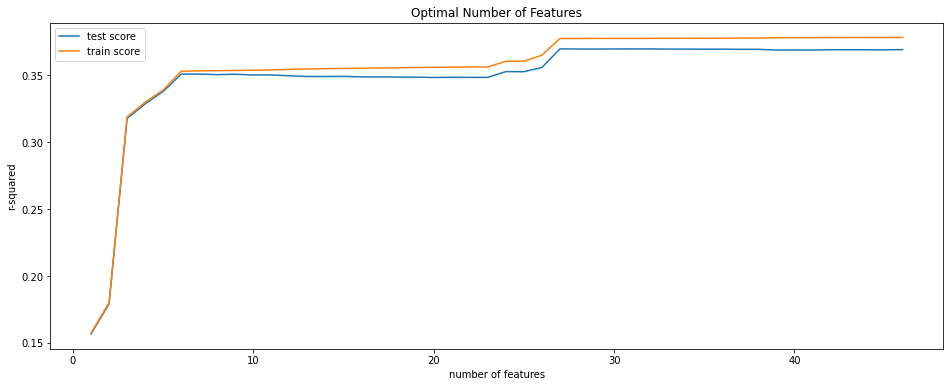

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
model_cv.best_score_

0.36988201731052506

In [ ]:
model_cv.best_params_

{'n_features_to_select': 27}

In [ ]:
model_cv.best_estimator_

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=27, step=1, verbose=0)

In [ ]:
# final model
n_features_optimal = 27

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.3505324180350715


In [ ]:
y_pred = lm.predict(X_final_test)

In [ ]:
y_pred

array([59.69510239, 58.94729253, 70.75610698, ..., 71.42594227,
       61.82854712, 47.53527636])

### Test Other regression algorithm

In [ ]:


def create_baseline_regressors(seed=8):
    models = []
    models.append(('lm', LinearRegression()))
    models.append(('dtr', DecisionTreeRegressor(random_state=seed)))
    models.append(('etr', ExtraTreesRegressor(random_state=seed)))
    models.append(('gbm', GradientBoostingRegressor(random_state=seed)))
    models.append(('rfr', RandomForestRegressor(random_state=seed)))
    models.append(('svc', SVR()))
    models.append(('xgb', XGBRegressor(seed=seed)))
    return models

lm: 0.368617 (0.031177)
dtr: 0.277999 (0.032750)
etr: 0.595188 (0.021709)
gbm: 0.576392 (0.016418)
rfr: 0.627609 (0.020592)
svc: 0.006212 (0.014076)
[06:55:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:55:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now dep

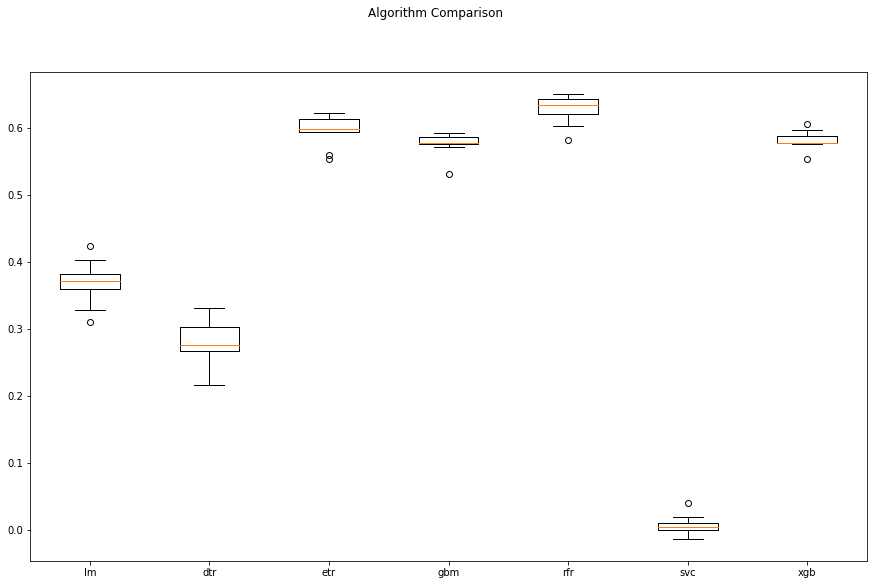

In [ ]:
results = []
seed = 11
names = []
scoring = 'r2'
for name, model in create_baseline_regressors():
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state = seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
# print(results)
fig = plt.figure(figsize=(15, 9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# # step-1: create a cross-validation scheme
# folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# # step-2: specify range of hyperparameters to tune
# hyper_params = [{'n_features_to_select': list(range(1, 47))}]


# # step-3: perform grid search
# # 3.1 specify model
# lm = RandomForestRegressor()
# lm.fit(X_train, y_train)
# rfe = RFE(lm)             

# # 3.2 call GridSearchCV()
# model_cv = GridSearchCV(estimator = rfe, 
#                         param_grid = hyper_params, 
#                         scoring= 'r2', 
#                         cv = folds, 
#                         verbose = 1,
#                         return_train_score=True)      

# # fit the model
# model_cv.fit(X_train, y_train)

In [ ]:
# # cv results
# cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results

In [ ]:
# # plotting cv results
# plt.figure(figsize=(16,6))

# plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
# plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
# plt.xlabel('number of features')
# plt.ylabel('r-squared')
# plt.title("Optimal Number of Features")
# plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
rfr = RandomForestRegressor(random_state=11)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)

In [ ]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(rfr, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.6375172 , 0.62149352, 0.63194966, 0.63005967, 0.60989505])

In [ ]:
rfr_pred = rfr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, rfr_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, rfr_pred))

Mean squared error: 86.73
Coefficient of determination: 0.61


In [ ]:
rfr_with_complete_train = RandomForestRegressor(random_state=11)
rfr_with_complete_train.fit(X_final, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)

In [ ]:
y_pred_rfr = rfr_with_complete_train.predict(X_final_test)
y_pred_rfr

array([90.8496, 90.2501, 81.6939, ..., 81.5727, 51.9272, 52.911 ])

### Analysis for Bias

In [ ]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [ ]:
len(train.BiasInfluentialFactor.unique())

10

In [ ]:
train_biased = train[train.BiasInfluentialFactor.notna()]

In [ ]:
train_biased_req_col = train_biased.drop(['EmpID', 'EmpName', 'GraduationYear', 'FitmentPercent'], axis=1)

In [ ]:
train_biased_req_col.shape

(10309, 18)

In [ ]:
X_biased = train_biased_req_col.drop(["BiasInfluentialFactor"], axis = 1)
y_biased = train_biased_req_col.BiasInfluentialFactor

In [ ]:
display(X_biased.shape)
display(y_biased.shape)

(10309, 17)

(10309,)

In [ ]:
y_biased

0          YearsOfExperince
2                    Gender
3                    Gender
4              DegreeBranch
5          YearsOfExperince
                ...        
13639                Gender
13640                Gender
13642    CurrentCompanyType
13643              EmpScore
13644      YearsOfExperince
Name: BiasInfluentialFactor, Length: 10309, dtype: object

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_biased)
y = pd.Series(encoder.transform(y_biased))
y.head()

0    8
1    4
2    4
3    1
4    8
dtype: int64

In [ ]:
X_biased_with_dummy_coding = pd.get_dummies(X_biased, drop_first=True)

In [ ]:
X_biased_with_dummy_coding.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,MartialStatus_Single,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,35,7,12,21,26,5,20,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,36,6,6,15,24,5,19,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
3,29,5,6,16,24,5,16,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,25,8,2,24,32,5,10,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5,35,9,12,25,29,4,10,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0


In [ ]:
X_biased_with_dummy_coding.shape

(10309, 47)

In [ ]:
X_biased_train, X_biased_test, y_biased_train, y_biased_test = train_test_split(X_biased_with_dummy_coding, y, test_size = 0.2, random_state = 20)

In [ ]:
display(X_biased_train.shape)
display(X_biased_test.shape)
display(y_biased_train.shape)
display(y_biased_test.shape)

(8247, 47)

(2062, 47)

(8247,)

(2062,)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def create_baseline_classifier(seed = 11):
  models = []
  models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('CART', DecisionTreeClassifier()))
  models.append(('NB', GaussianNB()))
  models.append(('RF', RandomForestClassifier()))
  models.append(('XGB', XGBClassifier()))
  models.append(('SVM', SVC()))
  models.append(('GBC', GradientBoostingClassifier()))
  return models

LDA: 0.720621 (0.018110)
KNN: 0.449257 (0.017391)
CART: 0.849642 (0.010265)
NB: 0.498605 (0.013666)
RF: 0.875349 (0.011272)
XGB: 0.900208 (0.010484)
SVM: 0.610037 (0.018596)
GBC: 0.902269 (0.010178)


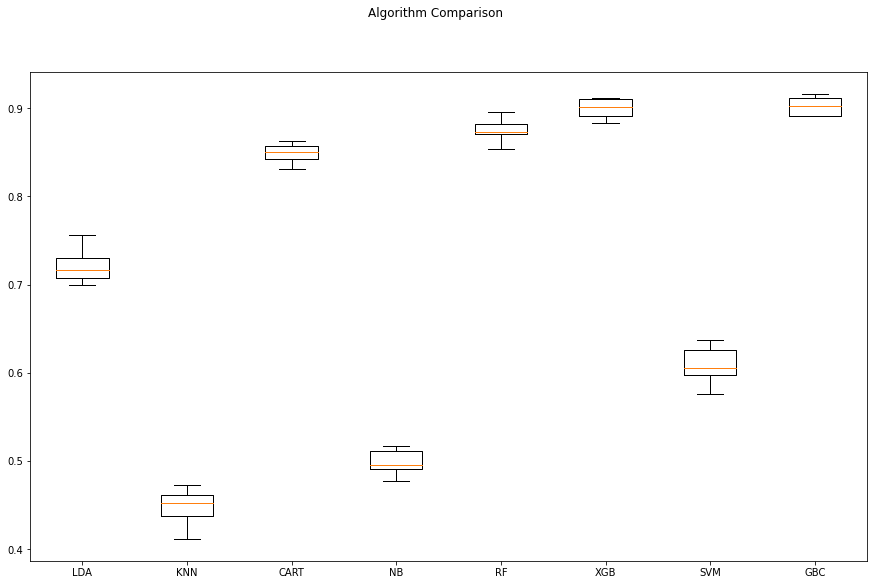

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in create_baseline_classifier():
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state = seed)
	cv_results = model_selection.cross_val_score(model, X_biased_train, y_biased_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
# print(results)
fig = plt.figure(figsize=(15, 9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
xgb = XGBClassifier(random_state=11)
xgb.fit(X_biased_train, y_biased_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=11,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_predict = xgb.predict(X_biased_test)

accuracy_score(y_biased_test, xgb_predict)

0.9093113482056256

In [ ]:
xgb.fit(X_biased_with_dummy_coding, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=11,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
final_predicted_xgb = xgb.predict(X_final_test)

In [ ]:
final_predicted_xgb.shape

(8745,)

In [ ]:
encoder.classes_

array(['CurrentCompanyType', 'DegreeBranch', 'EmpScore', 'Ethinicity',
       'Gender', 'HighestDegree', 'LatestDegreeCGPA', 'MartialStatus',
       'YearsOfExperince'], dtype=object)

In [ ]:
final_predicted_xgb_classes = encoder.inverse_transform(final_predicted_xgb)

In [ ]:
final_predicted_xgb_classes

array(['CurrentCompanyType', 'CurrentCompanyType', 'Ethinicity', ...,
       'DegreeBranch', 'CurrentCompanyType', 'DegreeBranch'], dtype=object)

In [ ]:
# final_predict_df = pd.DataFrame([test.EmpID.values, final_predicted_xgb_classes, y_pred_rfr], columns = ['EmpID', 'BiasInfluentialFactor', 'FitmentPercent'])
final_predict_df = pd.DataFrame({'EmpID': test.EmpID, 'BiasInfluentialFactor': final_predicted_xgb_classes, 'FitmentPercent': y_pred_rfr})

In [ ]:
test.EmpID.values.shape

(8745,)

In [ ]:
final_predicted_xgb_classes.shape

(8745,)

In [ ]:
y_pred_rfr.shape

(8745,)

In [ ]:
final_predict_df.head()

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,CurrentCompanyType,90.8496
1,23568,CurrentCompanyType,90.2501
2,21490,Ethinicity,81.6939
3,8363,CurrentCompanyType,54.2895
4,6165,Ethinicity,80.4962


In [ ]:
final_predict_df.to_csv('predict.csv', index=False)